<h3><center>EXPLORATORY DATA ANALYSIS OF AIRBNB LISTINGS IN CHICAGO  BY NEIGHBOURHOOD, TYPE OF LISTING, AND RATINGS</center></h3>
                 

<h4><center> - ANAGH SHARMA</center></h4>


### TABLE OF CONTENTS
1. Introduction
2. Data Summary
3. Exploratory data Analysis
4. Inference
5. Conclusion
6. Reference 

# Introduction

Airbnb is a popular online marketplace for short-term rentals. It allows homeowners and property managers to rent out their properties to travelers. Airbnb has grown rapidly in recent years, and it now has listings in over 190 countries and regions.

The objective of this project is to explore and analyze Airbnb data in order to gain insights into the Airbnb market.
We will be using the airbnb data to explore popular neighbourhoods , popular type of listings , the top hosts , the average prices of the listings and the ratings given to the listings.

I acquired my Airbnb data for Chicago from the Inside Airbnb website. The website provides a variety of datasets for different cities around the world.
http://insideairbnb.com/get-the-data/

This dataset includes information about Airbnb listings, such as the location, price, type of property and ratings from guests. I have also chosen to work with data on the number of Airbnb listings in each neighborhood and the availability of traditional rental properties in each neighborhood.

The research question I wanna answer is how do Airbnb prices in Chicago vary by neighborhood, type of listing, and other factors?

This is a broad research question, but it can be broken down into a number of smaller, more specific questions - 

- What are the average prices of Airbnb listings in different neighborhoods?
- What are the most popular types of Airbnb listings in Chicago? (e.g., apartments, houses, condos, etc.)?
- How do Airbnb guests rate their experiences in Chicago?
- What are the most popular Airbnb listings for people on a budget?
- What are the most popular Airbnb listings for people who are looking for a luxury experience?


# Data Summary


In this section, we will importing  the necessary Python libraries and  to explore the data set properties  like data type, null and non-null values, and number of attributes

In [708]:
# Import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import urllib
import cv2 


I acquired my Airbnb data for Chicago from the Inside Airbnb website. The website provides a variety of datasets for different cities around the world.
http://insideairbnb.com/get-the-data/

Then I  uploaded the csv file into my github repository and importing the file using the raw file link . 

In [709]:
# load the data set
df = pd.read_csv("https://raw.githubusercontent.com/anagh3395/DAV5400/main/Module5/chicago_listings.csv")

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,114,3,227,2023-09-03,2.15,1,322,20,R17000015609
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,92,32,505,2023-08-30,2.92,1,347,45,R21000075737
2,10945,Rental unit in Chicago · ★4.65 · 2 bedrooms · ...,33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,170,4,72,2023-08-29,0.63,7,146,16,2209984
3,12140,Boutique hotel in Chicago · ★4.93 · 1 bedroom ...,46734,Shay And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,329,2,15,2023-05-21,0.15,1,165,3,R20000055258
4,24833,Rental unit in Chicago · ★4.29 · 1 bedroom · 1...,101521,Red,NaN,Lincoln Park,41.925961,-87.656364,Entire home/apt,61,32,42,2023-04-22,0.26,4,284,2,City registration pending


In [710]:
df.shape

(8528, 18)

This Dataset contains 8528 rows and 18 columns

In [711]:
#Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8528 non-null   int64  
 1   name                            8528 non-null   object 
 2   host_id                         8528 non-null   int64  
 3   host_name                       8528 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8528 non-null   object 
 6   latitude                        8528 non-null   float64
 7   longitude                       8528 non-null   float64
 8   room_type                       8528 non-null   object 
 9   price                           8528 non-null   int64  
 10  minimum_nights                  8528 non-null   int64  
 11  number_of_reviews               8528 non-null   int64  
 12  last_review                     68

__Dataset atrributes:__ 

- id - the ID of the Listing (Categorical variable)

- name - Apartment description (Categorical variable) (we will separate into multiple features later)

- host_id - The ID of the Host (Categorical variable)

- host_name - The name of the host (Categorical variable)

- neighbourhood_group - The neighbourhood group belongs to (Categorical variable)

- neighbourhood - The neighbourhood listing belongs to (Categorical variable)

- latitude - Latitude value for the listing address 

- longitude - Longitude value for the listing address

- room_type - Type of Room (Private Room , Entire apartment) (Categorical variable)

- price - The price of the listing (Numerical)

- minimum_nights - The minimum nights the listing has to be booked for 

- number_of_reviews - Number of reviews of the listing

- last_review - The last review date of the booking

- reviews_per_month - The reviews per month for the listing

- calculated_host_listings_count - The listings count for the host

- availability_365 - The number of days the listing is available in an year

- number_of_reviews_ltm - The number of reviews received in last 12 months

- license - The License ID of the host



Some variables have null values for which we will perform data cleaning later

# Exploratory Data Analysis (EDA)

Investigating data sets to discover patterns, trends, and relationships to understand the data and identify potential problems. 

## Univariate Analysis

#### Getting additional important features from existing feature
- The feature name is a string which contains a lot of information about the listing . 
- For eg one of the values is 'Condo in Chicago · ★4.99 · 1 bedroom · 1 bed · 1 shared bath' . From this feature we can extract additional features like (what is the apartment type , rating , number of bedrooms,beds and bath for the listing) 

In [712]:
def get_values(string, separator="·"):
  """Extracts the values from a string separated by a given separator.

  Args:
    string: The string to extract the values from.
    separator: The separator to use to split the string.

  Returns:
    A list of the values.
  """

  values = string.split(separator)
  # Strip whitespace from the values.
  values = [value.strip() for value in values]
  return values

def contains_star(string):
    return re.search(r'\★', string)

def get_number_from_string(string):
  """Extracts the number from a string.

  Args:
    string: The string to extract the number from.

  Returns:
    The number, or None if the string does not contain a number.
  """

  number_pattern = r'\d+\.\d+'
  number_match = re.search(number_pattern, string)

  if number_match is not None:
    return float(number_match.group())
  else:
    return None

# Dropping the rows which do not have atleast 4 elements in the array 
df['count'] = df.apply(lambda x: len(get_values(x['name'])),axis=1)
indexes = df[df['count'] < 4].index
df = df.drop(indexes)

for index, row in df.iterrows():
    
    df.loc[index, 'type_of_apartment'] = get_values(row['name'])[0]
    # If the length of the array is 5 and the name attribute contains star
    # This means it contains the rating and every other field required
    if contains_star(get_values(row['name'])[1]) and len(get_values(row['name'])) == 5:
        df.loc[index, 'rating'] = get_number_from_string(get_values(row['name'])[1])
        df.loc[index, 'bedroom'] = get_values(row['name'])[2]
        df.loc[index, 'beds'] = get_values(row['name'])[3]
        df.loc[index, 'bath'] = get_values(row['name'])[4]
        
    # If the length of the array is 4 and the name attribute contains star
    # This means it contains the rating but misses one of the other fields
    elif contains_star(get_values(row['name'])[1]) and len(get_values(row['name'])) == 4:
        df.loc[index, 'rating'] = get_number_from_string(get_values(row['name'])[1])
        df.loc[index, 'bedroom'] = get_values(row['name'])[2]
        bath_regex = re.compile(r'bath')
        # If contains the bath string
        if bath_regex.search(get_values(row['name'])[3]):
            df.loc[index, 'bath'] = get_values(row['name'])[3]
            df.loc[index, 'beds'] = np.nan
        # If it does not contain the bath string
        else:
            df.loc[index, 'beds'] = get_values(row['name'])[3]
            df.loc[index, 'bath'] = np.nan
                
    # If it does not contain the star that means it does not have a rating    
    else:
        df.loc[index, 'rating'] = np.nan
        df.loc[index, 'bedroom'] = get_values(row['name'])[1]
        df.loc[index, 'beds'] = get_values(row['name'])[2]
        df.loc[index, 'bath'] = get_values(row['name'])[3]
        
        
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,count,type_of_apartment,rating,bedroom,beds,bath
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,114,...,1,322,20,R17000015609,5,Condo in Chicago,4.99,1 bedroom,1 bed,1 shared bath
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,92,...,1,347,45,R21000075737,5,Rental unit in Chicago,4.70,1 bedroom,1 bed,1 bath
2,10945,Rental unit in Chicago · ★4.65 · 2 bedrooms · ...,33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,170,...,7,146,16,2209984,5,Rental unit in Chicago,4.65,2 bedrooms,2 beds,1 bath
3,12140,Boutique hotel in Chicago · ★4.93 · 1 bedroom ...,46734,Shay And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,329,...,1,165,3,R20000055258,5,Boutique hotel in Chicago,4.93,1 bedroom,1 bed,1 private bath
4,24833,Rental unit in Chicago · ★4.29 · 1 bedroom · 1...,101521,Red,NaN,Lincoln Park,41.925961,-87.656364,Entire home/apt,61,...,4,284,2,City registration pending,5,Rental unit in Chicago,4.29,1 bedroom,1 bed,1 bath
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,976998614768513719,Rental unit in Chicago · ★New · 5 bedrooms · 8...,11120895,Louis,NaN,Near West Side,41.875333,-87.689492,Entire home/apt,438,...,3,222,0,R21000072889,5,Rental unit in Chicago,NaN,5 bedrooms,8 beds,3 baths
8524,977144971555557664,Home in Chicago · ★New · 1 bedroom · 1 bed · 2...,260588213,Zaine Lizandra,NaN,Mckinley Park,41.825997,-87.669151,Private room,32,...,9,354,0,R21000063925,5,Home in Chicago,NaN,1 bedroom,1 bed,2 shared baths
8525,977746614717655088,Home in Chicago · ★New · 3 bedrooms · 3 beds ·...,536514763,Jaylin,NaN,West Englewood,41.763133,-87.656318,Entire home/apt,24,...,1,269,0,NaN,5,Home in Chicago,NaN,3 bedrooms,3 beds,2 baths
8526,977980712187801208,Rental unit in Chicago · ★New · 1 bedroom · 1 ...,107434423,Blueground,NaN,Loop,41.869479,-87.631225,Entire home/apt,127,...,645,332,0,NaN,5,Rental unit in Chicago,NaN,1 bedroom,1 bed,1 bath


#### Attributes of not much significance 
- id - We dont really need ID of the listing.
- name - Since we have already extracted important information from this feature we dont need it now.
- host_id - We are already taking host names for analysis . Taking host_id too seems redundant.
- neighbourhood_group - It does not contain any non-null values . So it is completely insignificant.
- last_review - The last review date is not of much significance.
- reviews_per_month - We already have number of reviews feature.
- number_of_reviews_ltm -  We dont eed this as we already have number of reviews feature.
- license - We dont need license ID for analysis at the moment.

#### Dropping unneccesary features

In [713]:
df = df.drop(['id','name','host_id','neighbourhood_group','count','number_of_reviews_ltm',
              'last_review','reviews_per_month','license'],axis=1)

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8506 entries, 0 to 8527
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       8506 non-null   object 
 1   neighbourhood                   8506 non-null   object 
 2   latitude                        8506 non-null   float64
 3   longitude                       8506 non-null   float64
 4   room_type                       8506 non-null   object 
 5   price                           8506 non-null   int64  
 6   minimum_nights                  8506 non-null   int64  
 7   number_of_reviews               8506 non-null   int64  
 8   calculated_host_listings_count  8506 non-null   int64  
 9   availability_365                8506 non-null   int64  
 10  type_of_apartment               8506 non-null   object 
 11  rating                          5879 non-null   float64
 12  bedroom                         85

- Note that we have 5 additional features to our dataframe 
- Also the Dtype for each attibute is correct (object for categorical and float64,int64 for numerical variables) . So we wont need to convert any variable to the other type.

In [715]:
df.shape

(8506, 15)

In [716]:
df.head()

,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,type_of_apartment,rating,bedroom,beds,bath
0,Rebecca,Hyde Park,41.787900,-87.587800,Private room,114,3,227,1,322,Condo in Chicago,4.99,1 bedroom,1 bed,1 shared bath
1,Sarah,West Town,41.901660,-87.680210,Entire home/apt,92,32,505,1,347,Rental unit in Chicago,4.70,1 bedroom,1 bed,1 bath
2,At Home Inn,Lincoln Park,41.911960,-87.639810,Entire home/apt,170,4,72,7,146,Rental unit in Chicago,4.65,2 bedrooms,2 beds,1 bath
3,Shay And Robert,Lincoln Park,41.923570,-87.649470,Private room,329,2,15,1,165,Boutique hotel in Chicago,4.93,1 bedroom,1 bed,1 private bath
4,Red,Lincoln Park,41.925961,-87.656364,Entire home/apt,61,32,42,4,284,Rental unit in Chicago,4.29,1 bedroom,1 bed,1 bath


In [717]:
# Show the descriptive statistics for numerical variables
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rating
count,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,5879.000000
mean,41.892217,-87.661855,199.255349,15.690336,46.714790,58.115801,214.914531,4.774514
std,0.062775,0.044106,267.550930,40.303094,87.861866,168.761371,126.484417,0.260810
min,41.646767,-87.847243,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,41.863335,-87.686209,87.000000,2.000000,1.000000,1.000000,98.000000,4.690000
50%,41.896410,-87.657269,135.000000,2.000000,14.000000,3.000000,245.000000,4.840000
75%,41.935580,-87.630197,214.000000,32.000000,54.000000,18.750000,338.000000,4.940000
max,42.022200,-87.528420,7585.000000,1125.000000,3332.000000,645.000000,365.000000,5.000000


In [718]:
# Show the categorical variables descriptive stattistics
df.describe(include = ['object'])

,host_name,neighbourhood,room_type,type_of_apartment,bedroom,beds,bath
count,8506,8506,8506,8506,8506,8481,8495
unique,2109,77,4,47,14,20,34
top,Blueground,Near North Side,Entire home/apt,Rental unit in Chicago,1 bedroom,1 bed,1 bath
freq,645,1034,6490,5092,3812,3658,4481


In [719]:
# Separating the features into numerical and categorical features
numerical_features = [column for column in df.columns if df[column].dtype != 'O']
categorical_features = [column for column in df.columns if df[column].dtype == 'O']

print('{} Numerical Features : {}'.format(len(numerical_features),numerical_features))
print('{} Categorical Features : {}'.format(len(categorical_features),categorical_features))

8 Numerical Features : ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'rating']
7 Categorical Features : ['host_name', 'neighbourhood', 'room_type', 'type_of_apartment', 'bedroom', 'beds', 'bath']


In [720]:
#proportion of count data on caregorical columns 
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("\n\n")

Blueground      7.582883
Rob             0.952269
Milan           0.858218
Jennifer        0.834705
Joe             0.811192
                  ...   
Kymi            0.011756
Adamm           0.011756
Maria Teresa    0.011756
Nael            0.011756
Jaylin          0.011756
Name: host_name, Length: 2109, dtype: float64



Near North Side    12.156125
West Town           9.863626
Lake View           7.241947
Near West Side      6.078063
Logan Square        5.525511
                     ...    
Mount Greenwood     0.023513
Edison Park         0.023513
Avalon Park         0.023513
Burnside            0.011756
Riverdale           0.011756
Name: neighbourhood, Length: 77, dtype: float64



Entire home/apt    76.299083
Private room       22.066776
Shared room         1.116859
Hotel room          0.517282
Name: room_type, dtype: float64



Rental unit in Chicago               59.863626
Home in Chicago                      14.131202
Condo in Chicago                     12.367740
Serviced apart

#### Hosts who  have the most listings on Airbnb 

In [721]:
hosts_with_most_listings =df.host_name.value_counts().head(15)
top_hosts_df =pd.DataFrame(hosts_with_most_listings)
top_hosts_df.reset_index(inplace=True)
top_hosts_df.rename(columns={'index':'Host_Name', 'host_name':'Listings'}, inplace=True)
top_hosts_df

,Host_Name,Listings
0,Blueground,645
1,Rob,81
2,Milan,73
3,Jennifer,71
4,Joe,69
5,David,67
6,RoomPicks By Antony,58
7,Zencity,57
8,Matt,57
9,John,56


#### Neighbourhoods which  have the most listings on Airbnb 

In [722]:
neighbourhoods_with_most_listings =df.neighbourhood.value_counts().head(15)
top_neighbourhoods_df =pd.DataFrame(neighbourhoods_with_most_listings)
top_neighbourhoods_df.reset_index(inplace=True)
top_neighbourhoods_df.rename(columns={'index':'Neighbourhood', 'neighbourhood':'Listings'}, inplace=True)
top_neighbourhoods_df

,Neighbourhood,Listings
0,Near North Side,1034
1,West Town,839
2,Lake View,616
3,Near West Side,517
4,Logan Square,470
5,Loop,465
6,Lincoln Park,311
7,Near South Side,246
8,Lower West Side,241
9,Uptown,219


#### Using Matplotlib

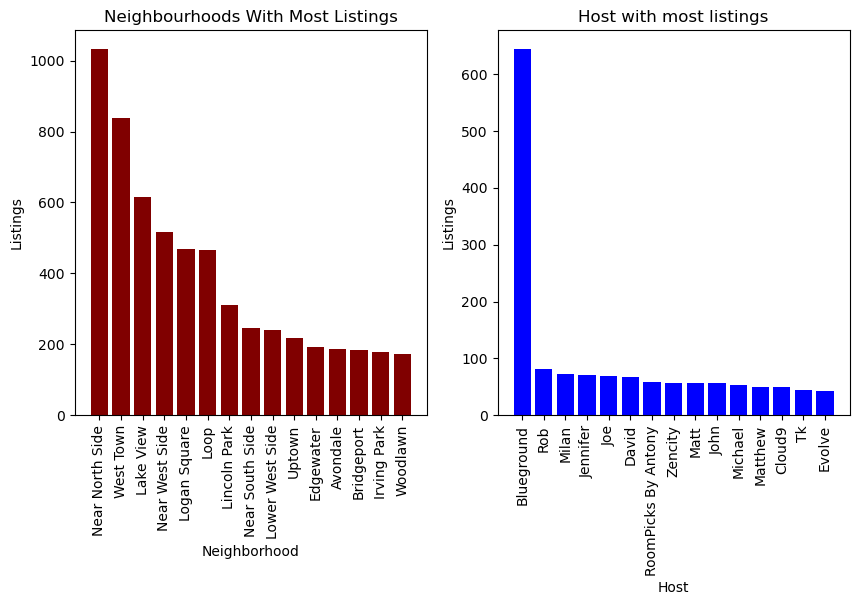

In [723]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(top_neighbourhoods_df['Neighbourhood'],top_neighbourhoods_df['Listings'],color = 'maroon')
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Neighbourhoods With Most Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Listings')

# Axis level for plot 2
plt.subplot(1, 2, 2) 
plt.bar(top_hosts_df['Host_Name'],top_hosts_df['Listings'],color = 'blue')
# Set plot label and title
plt.xticks(rotation = 90)
plt.title('Host with most listings')
plt.xlabel('Host')
plt.ylabel('Listings')
plt.show();

#### Using Seaborn

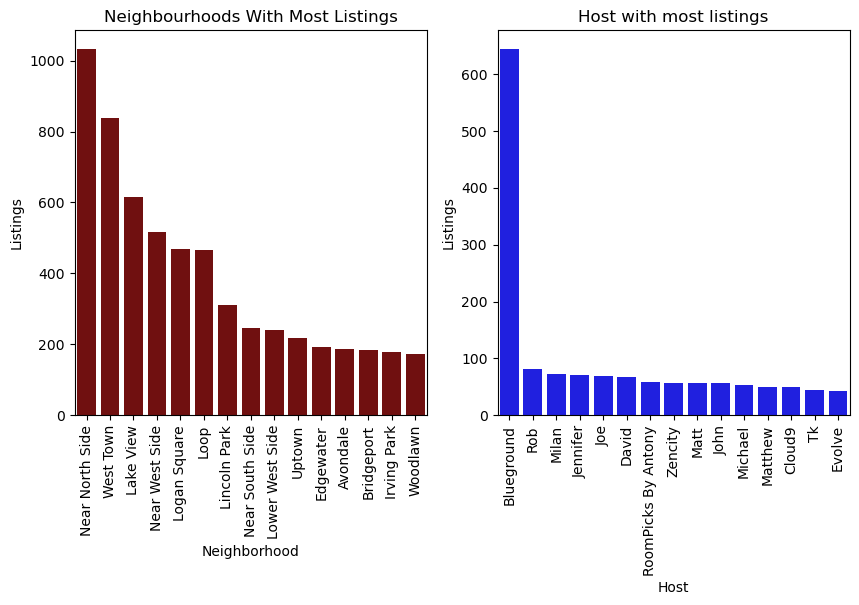

In [724]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='Neighbourhood', y='Listings', data=top_neighbourhoods_df, color = 'maroon')
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Neighbourhoods With Most Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Listings')


plt.subplot(1, 2, 2) 
sns.barplot(x="Host_Name", y='Listings', data=top_hosts_df,color = 'blue')
# Set plot label and title
plt.xticks(rotation = 90)
plt.title('Host with most listings')
plt.xlabel('Host')
plt.ylabel('Listings')
plt.show();

It is not possible to display all the neighbourhoods, hosts  in a single visualization without making it messy and difficult to interpret. Additionally, the majority of neighborhoods have very similar value counts after a certain point meaning that there is not a lot of variation in the data. Therefore, I have only displayed the top 15 neighborhoods,hosts in the visualization.

#### Neighbourhood
As we can see from the bar charts, Near North Side  is the most popular neighborhood in Chicago for Airbnb listings, followed by West Town, Lake View, West Side, Logan Square and Loop.
#### Host
Blueground rental agency has the most listings on airbnb for Chicago (645) and kind of dominates over the market . It is followed by Rob, Milan,Jennifer and Joe who have listings count from 81 to 69.


In [725]:
apartment_type_with_most_listings =df.type_of_apartment.value_counts().head(10)
top_apartment_type_df =pd.DataFrame(apartment_type_with_most_listings)
top_apartment_type_df.reset_index(inplace=True)
top_apartment_type_df.rename(columns={'index':'Apartment_Type', 'type_of_apartment':'Listings'}, inplace=True)
top_apartment_type_df

,Apartment_Type,Listings
0,Rental unit in Chicago,5092
1,Home in Chicago,1202
2,Condo in Chicago,1052
3,Serviced apartment in Chicago,192
4,Guest suite in Chicago,189
5,Townhouse in Chicago,173
6,Hotel in Chicago,170
7,Loft in Chicago,109
8,Boutique hotel in Chicago,81
9,Guesthouse in Chicago,59


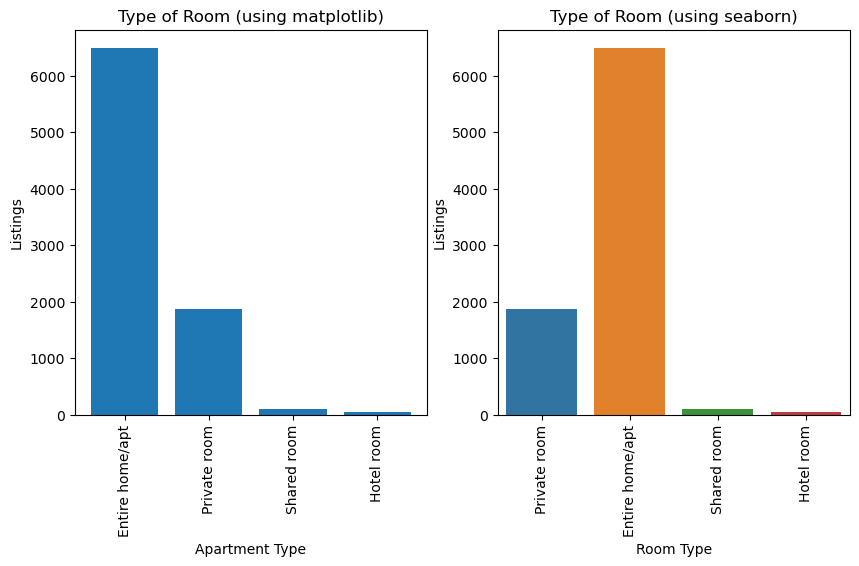

In [726]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
counts = df['room_type'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Type of Room (using matplotlib)')
plt.xlabel('Apartment Type')
plt.ylabel('Listings')

# Axis level for plot 2
plt.subplot(1, 2, 2) 
sns.countplot(x=df['room_type'])
# Set plot label and title
plt.xticks(rotation = 90)
plt.title('Type of Room (using seaborn)')
plt.xlabel('Room Type')
plt.ylabel('Listings')
plt.show();

As we see most of the listings are for Entire home / apartments which is far greater than any other apartment type . It is followed by Private Room and the count is very nominal for Shared and Hotel Room.

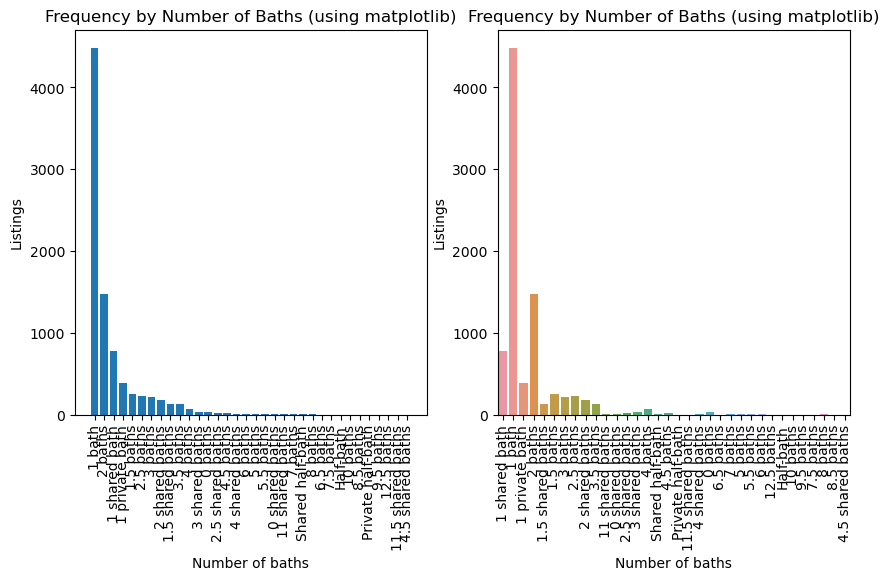

In [727]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
counts = df['bath'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Frequency by Number of Baths (using matplotlib)')
plt.xlabel('Number of baths')
plt.ylabel('Listings')

# Axis level for plot 2
plt.subplot(1, 2, 2) 
sns.countplot(x=df['bath'])
# Set plot label and title
plt.xticks(rotation = 90)
plt.title('Frequency by Number of Baths (using matplotlib)')
plt.xlabel('Number of baths')
plt.ylabel('Listings')
plt.show();

#### Most of the listings have 1 bath , 2 baths , 1 shared bath , 1 private bath . As the number of increases decreases the listings count decreases exponentially

### Numerical Features


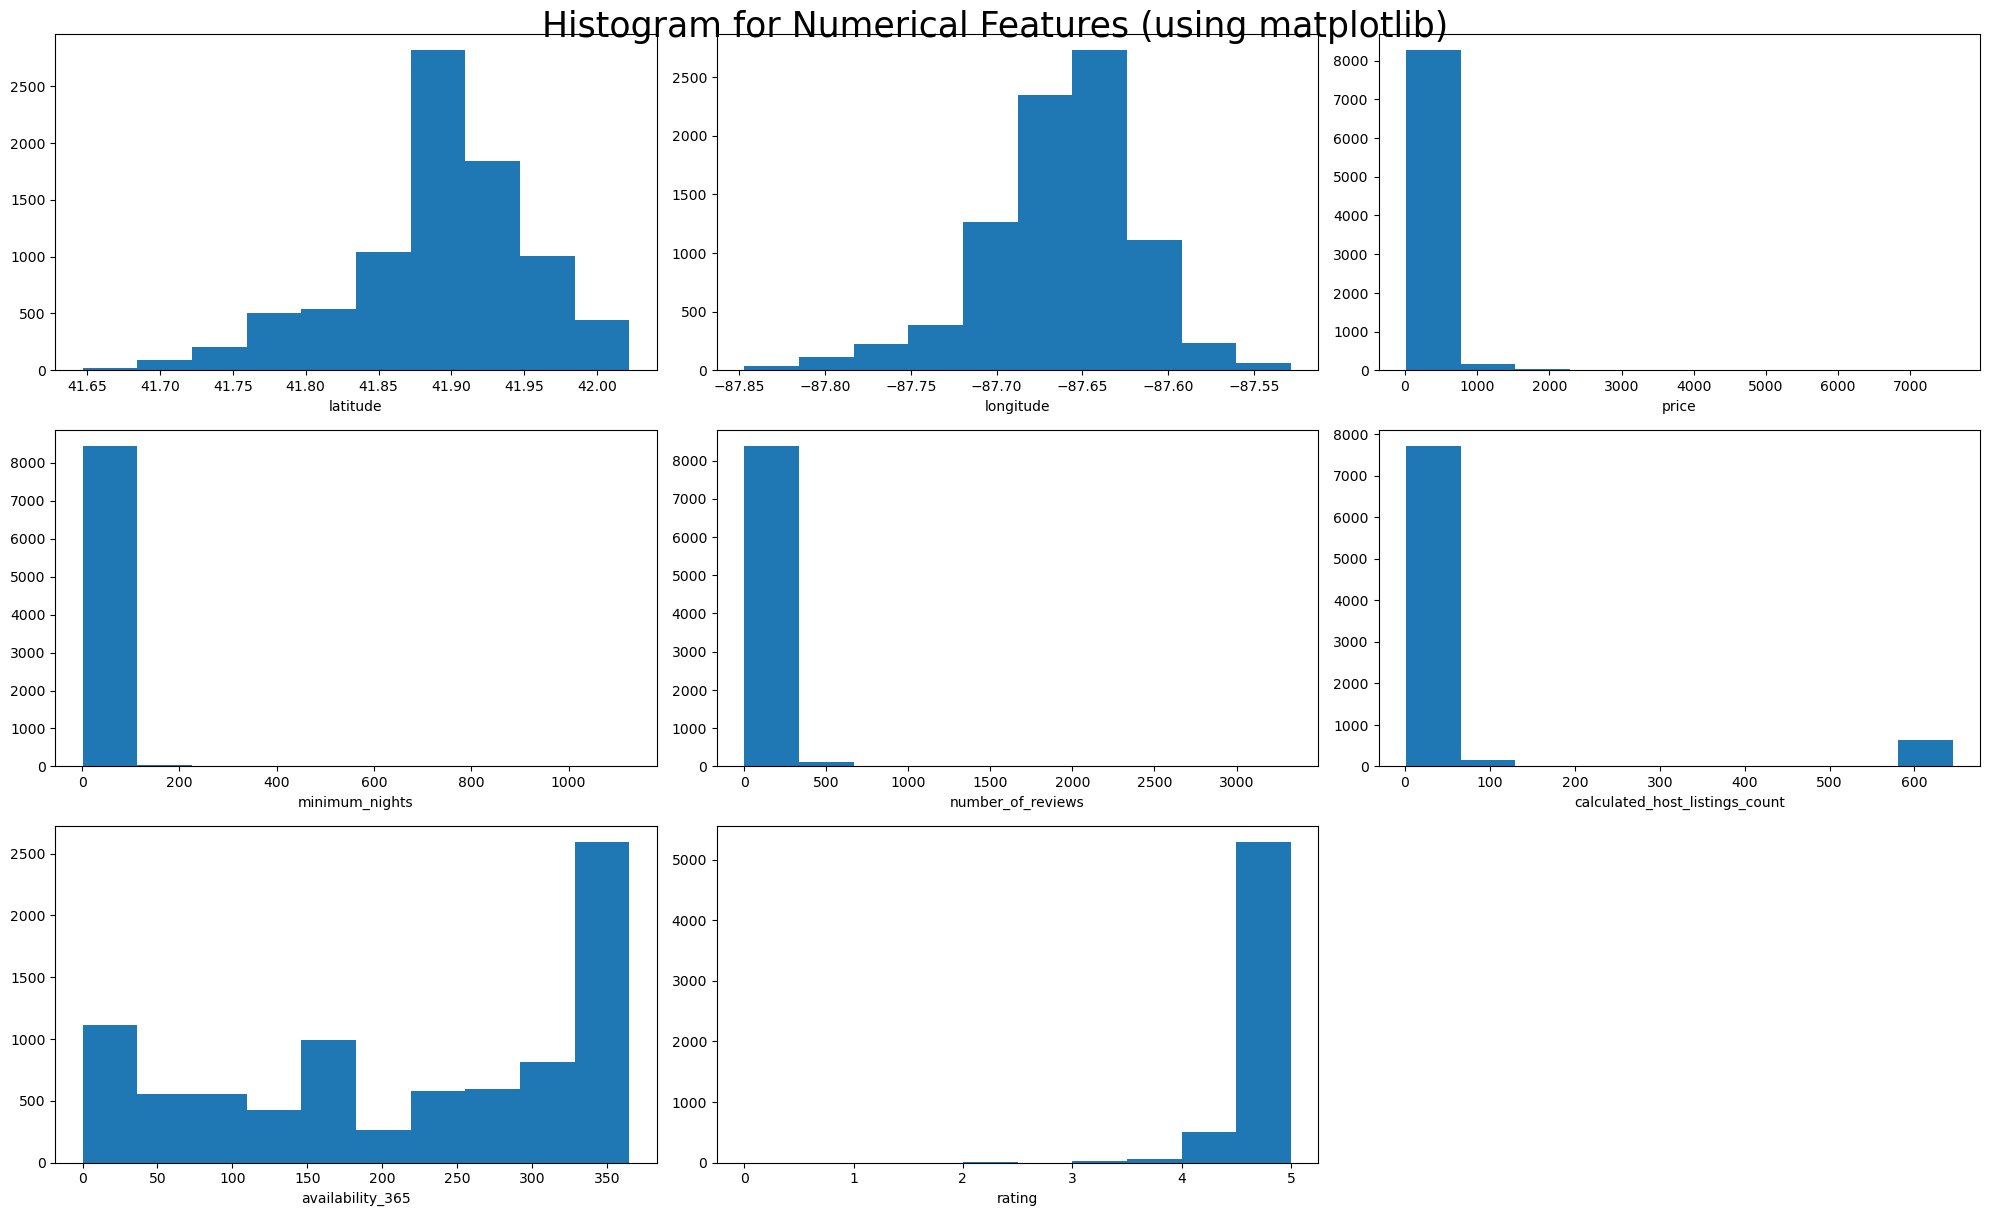

In [728]:
plt.figure(figsize=(20,20))
plt.suptitle('Histogram for Numerical Features (using matplotlib)',fontsize= 25)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    plt.hist(x=df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

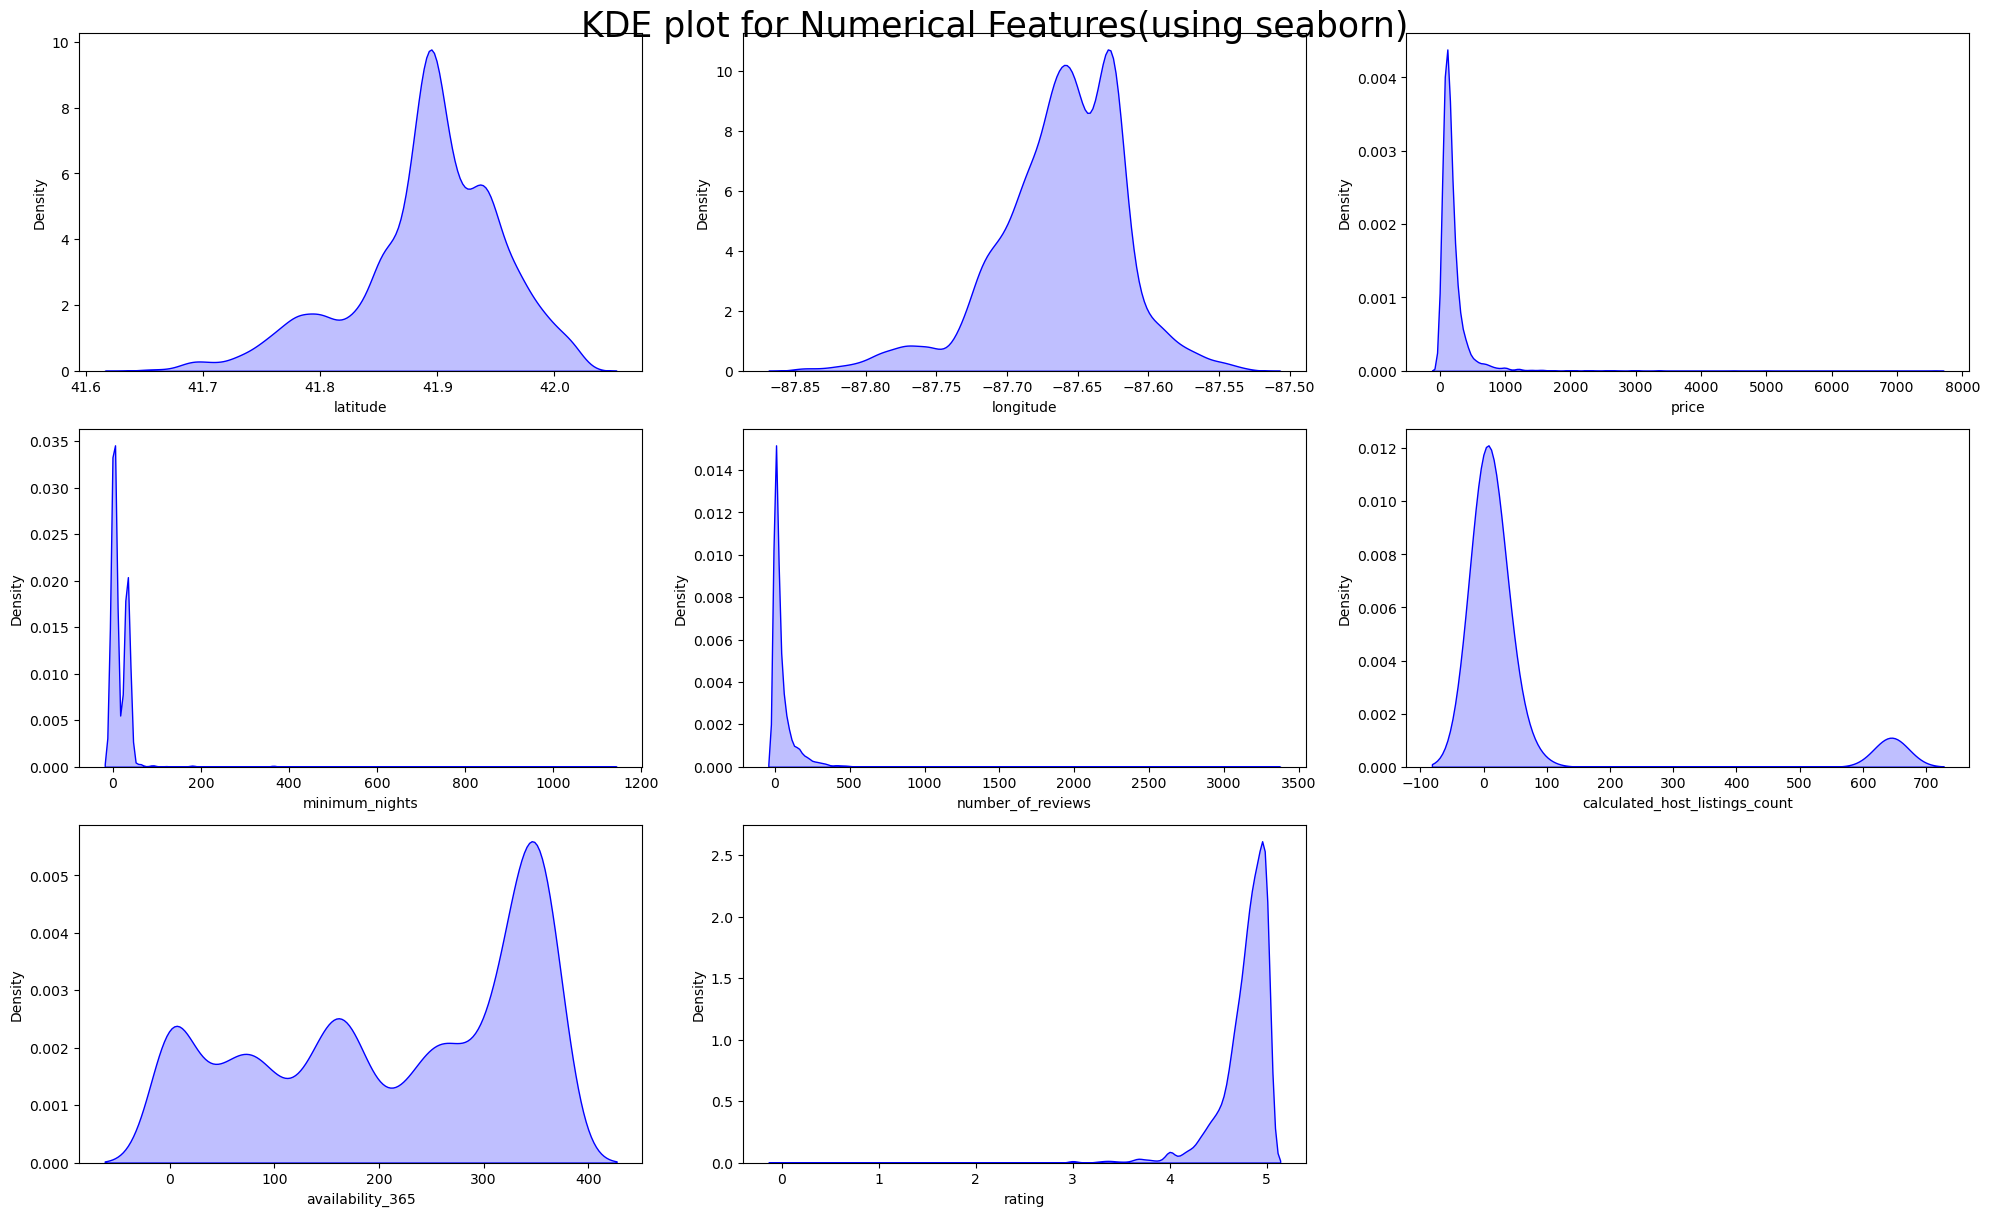

In [729]:
plt.figure(figsize=(20,20))
plt.suptitle('KDE plot for Numerical Features(using seaborn)',fontsize= 25)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_features[i]],fill = True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

<h4> Price </h4>
Plot shows that the price feature in the Airbnb Chicago dataset is not normally distributed. There is a peak in the distribution at around 135 dollars per night, but there are also listings available for much higher and lower prices.

<h4> Minimum Nights </h4>
Plot shows that the minimum_nights feature in the Airbnb Chicago dataset is not normally distributed. There is a peak in the distribution at around 2 nights, but there are also listings available for much shorter and longer stays.

<h4>Number of Reviews </h4> 
Plot shows that the number_of_reviews feature in the Airbnb Chicago dataset is not normally distributed. There is a peak in the distribution at around 14 reviews, but there are also listings available with many more or fewer reviews.

<h4> Host Listings Count </h4>
Plot shows that the calulated_host_listings_count feature in the Airbnb Chicago dataset is not normally distributed. There is a peak in the distribution at around 3 listings, but there are also hosts with many more or fewer listings. We also see there is one host "Blueground" which has a spike at around 645 . This is the dominating host with most number of listings. 

<h4> Availability 365 </h4>
Plot shows that the majority of Airbnb listings in Chicago are available for more than 300 days per year. There are also a lot of data points for this feature which contains zero or more than 365 (which does not make sense) . We will handle that later.

<h4> Rating </h4>
Plot shows that the most common rating is between 4.7 to 5 . There are a few ratings in the range from 3 to 4.7 . Very few ratings are below 3 . Although this feature contains a lot of null values for which are gonna impute the value with mean rating value.

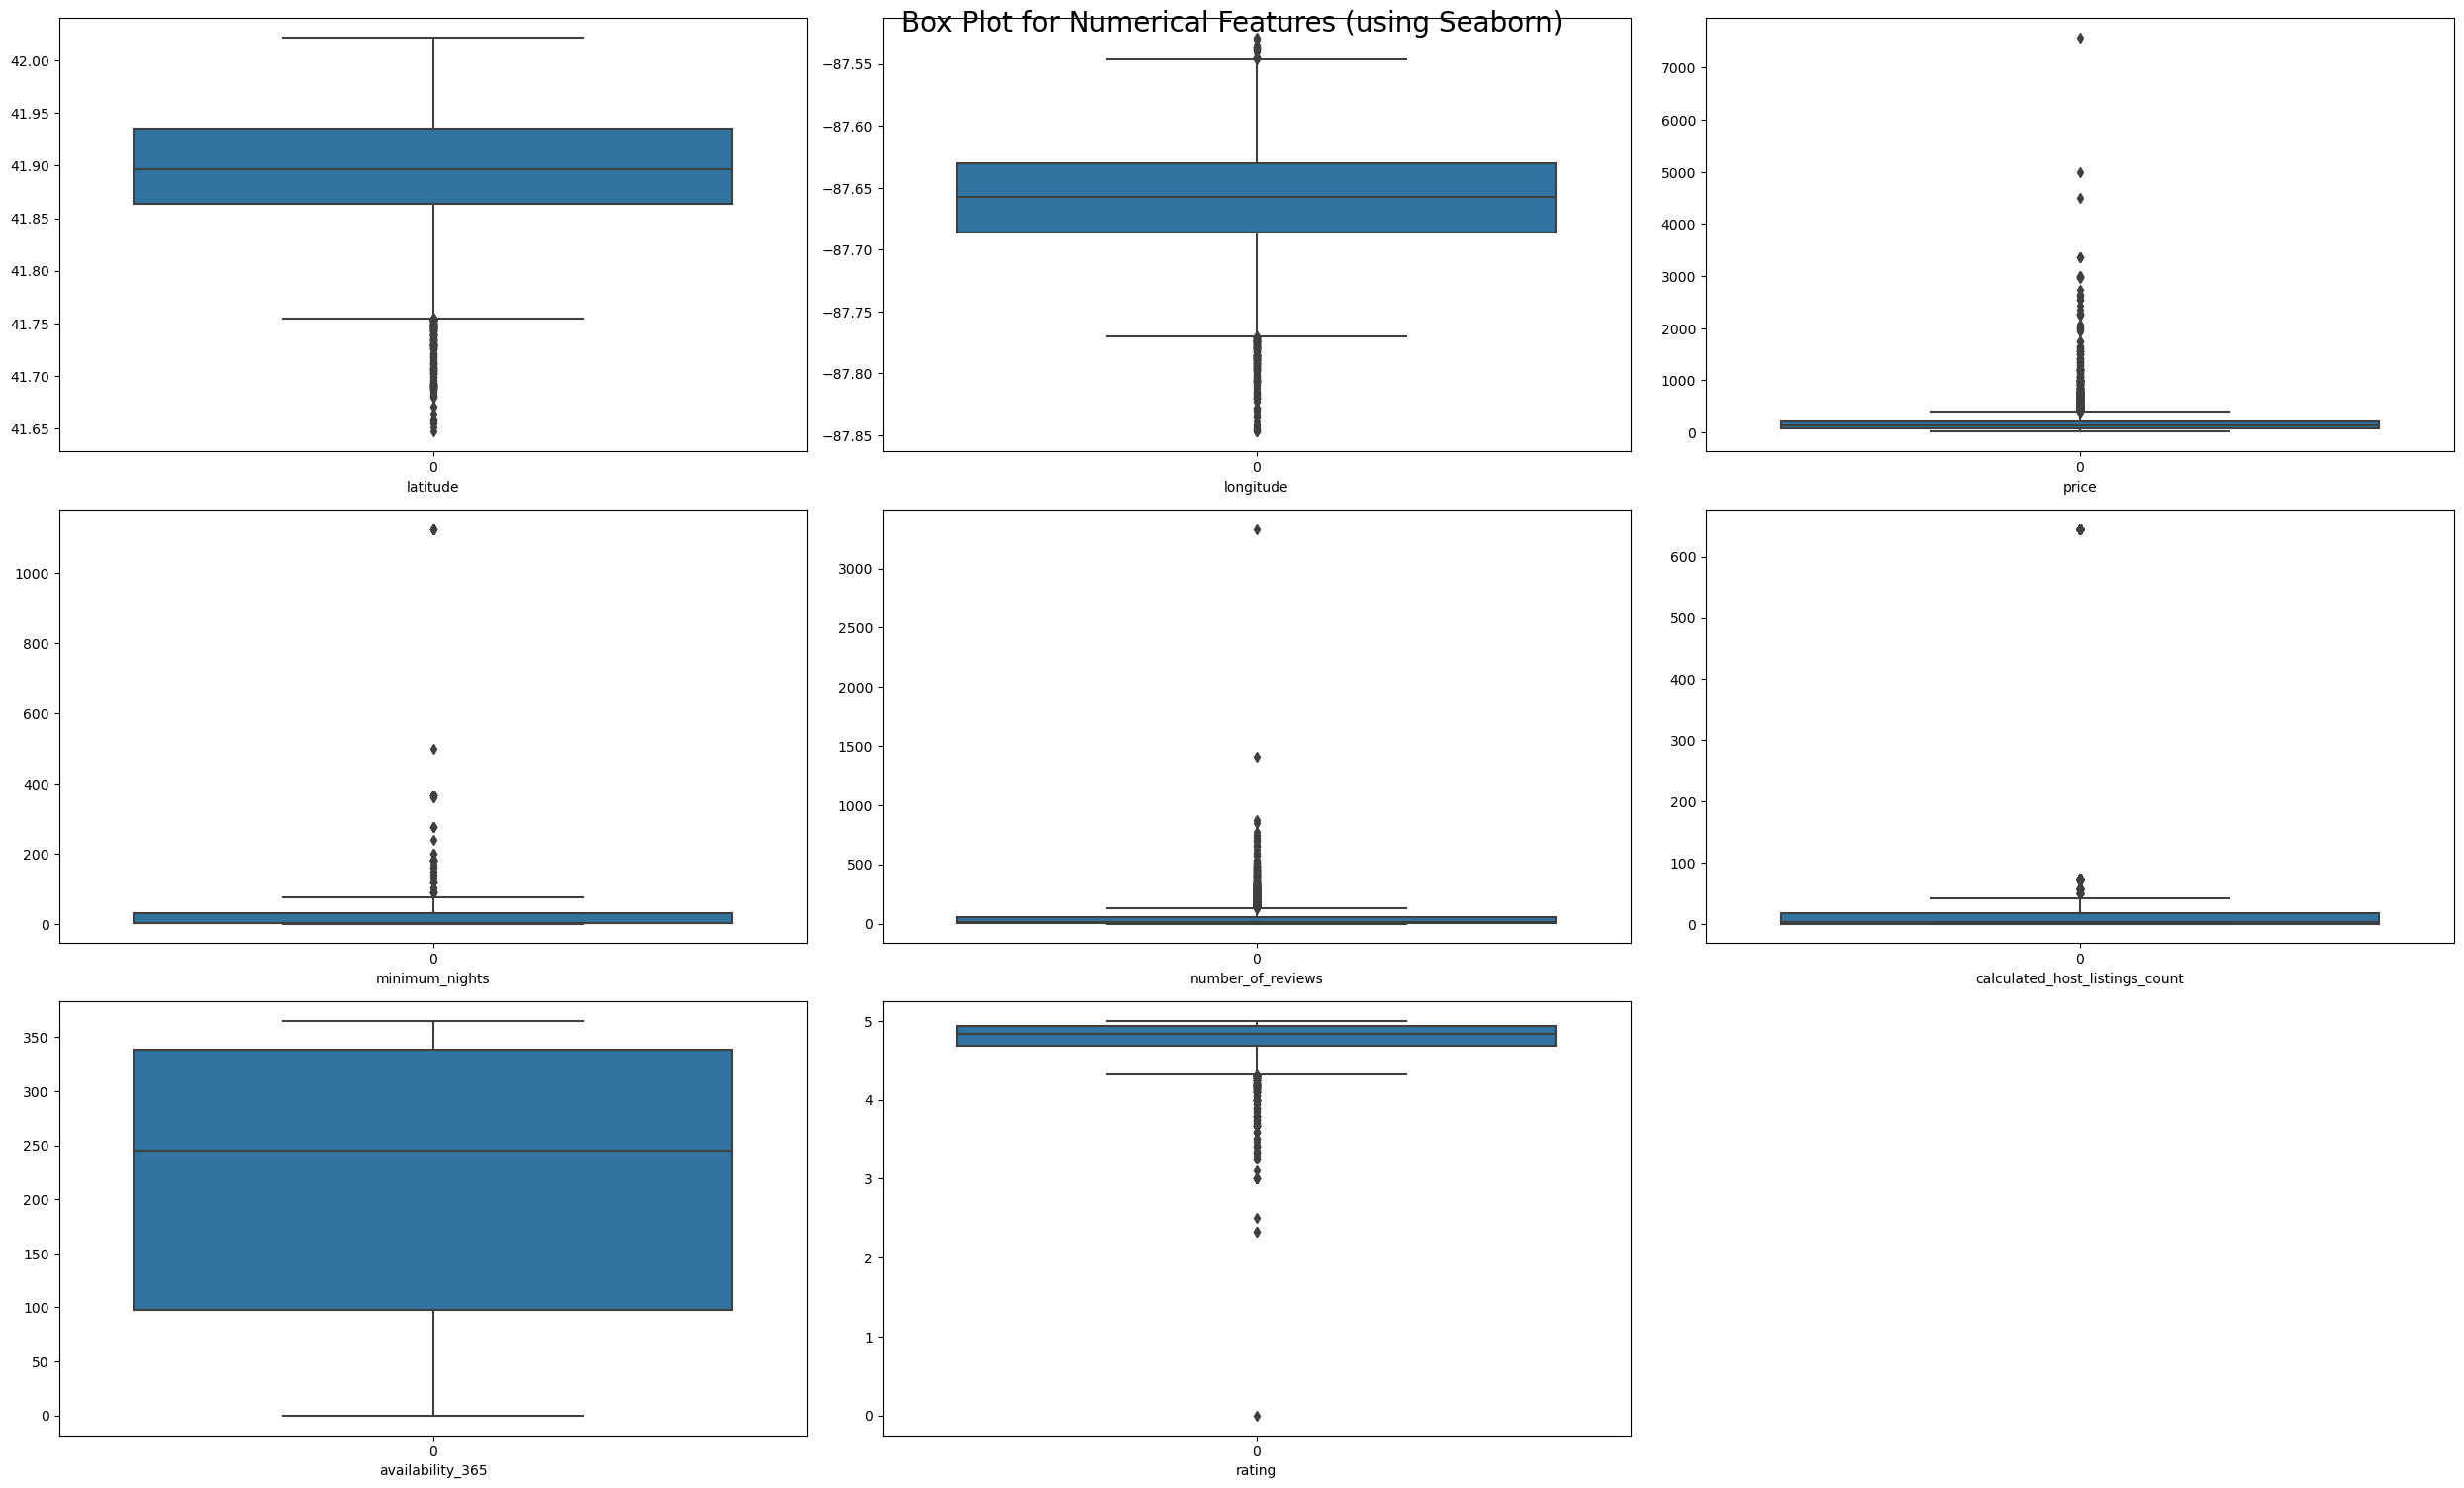

In [730]:
plt.figure(figsize=(25,25))
plt.suptitle('Box Plot for Numerical Features (using Seaborn)',fontsize= 20)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

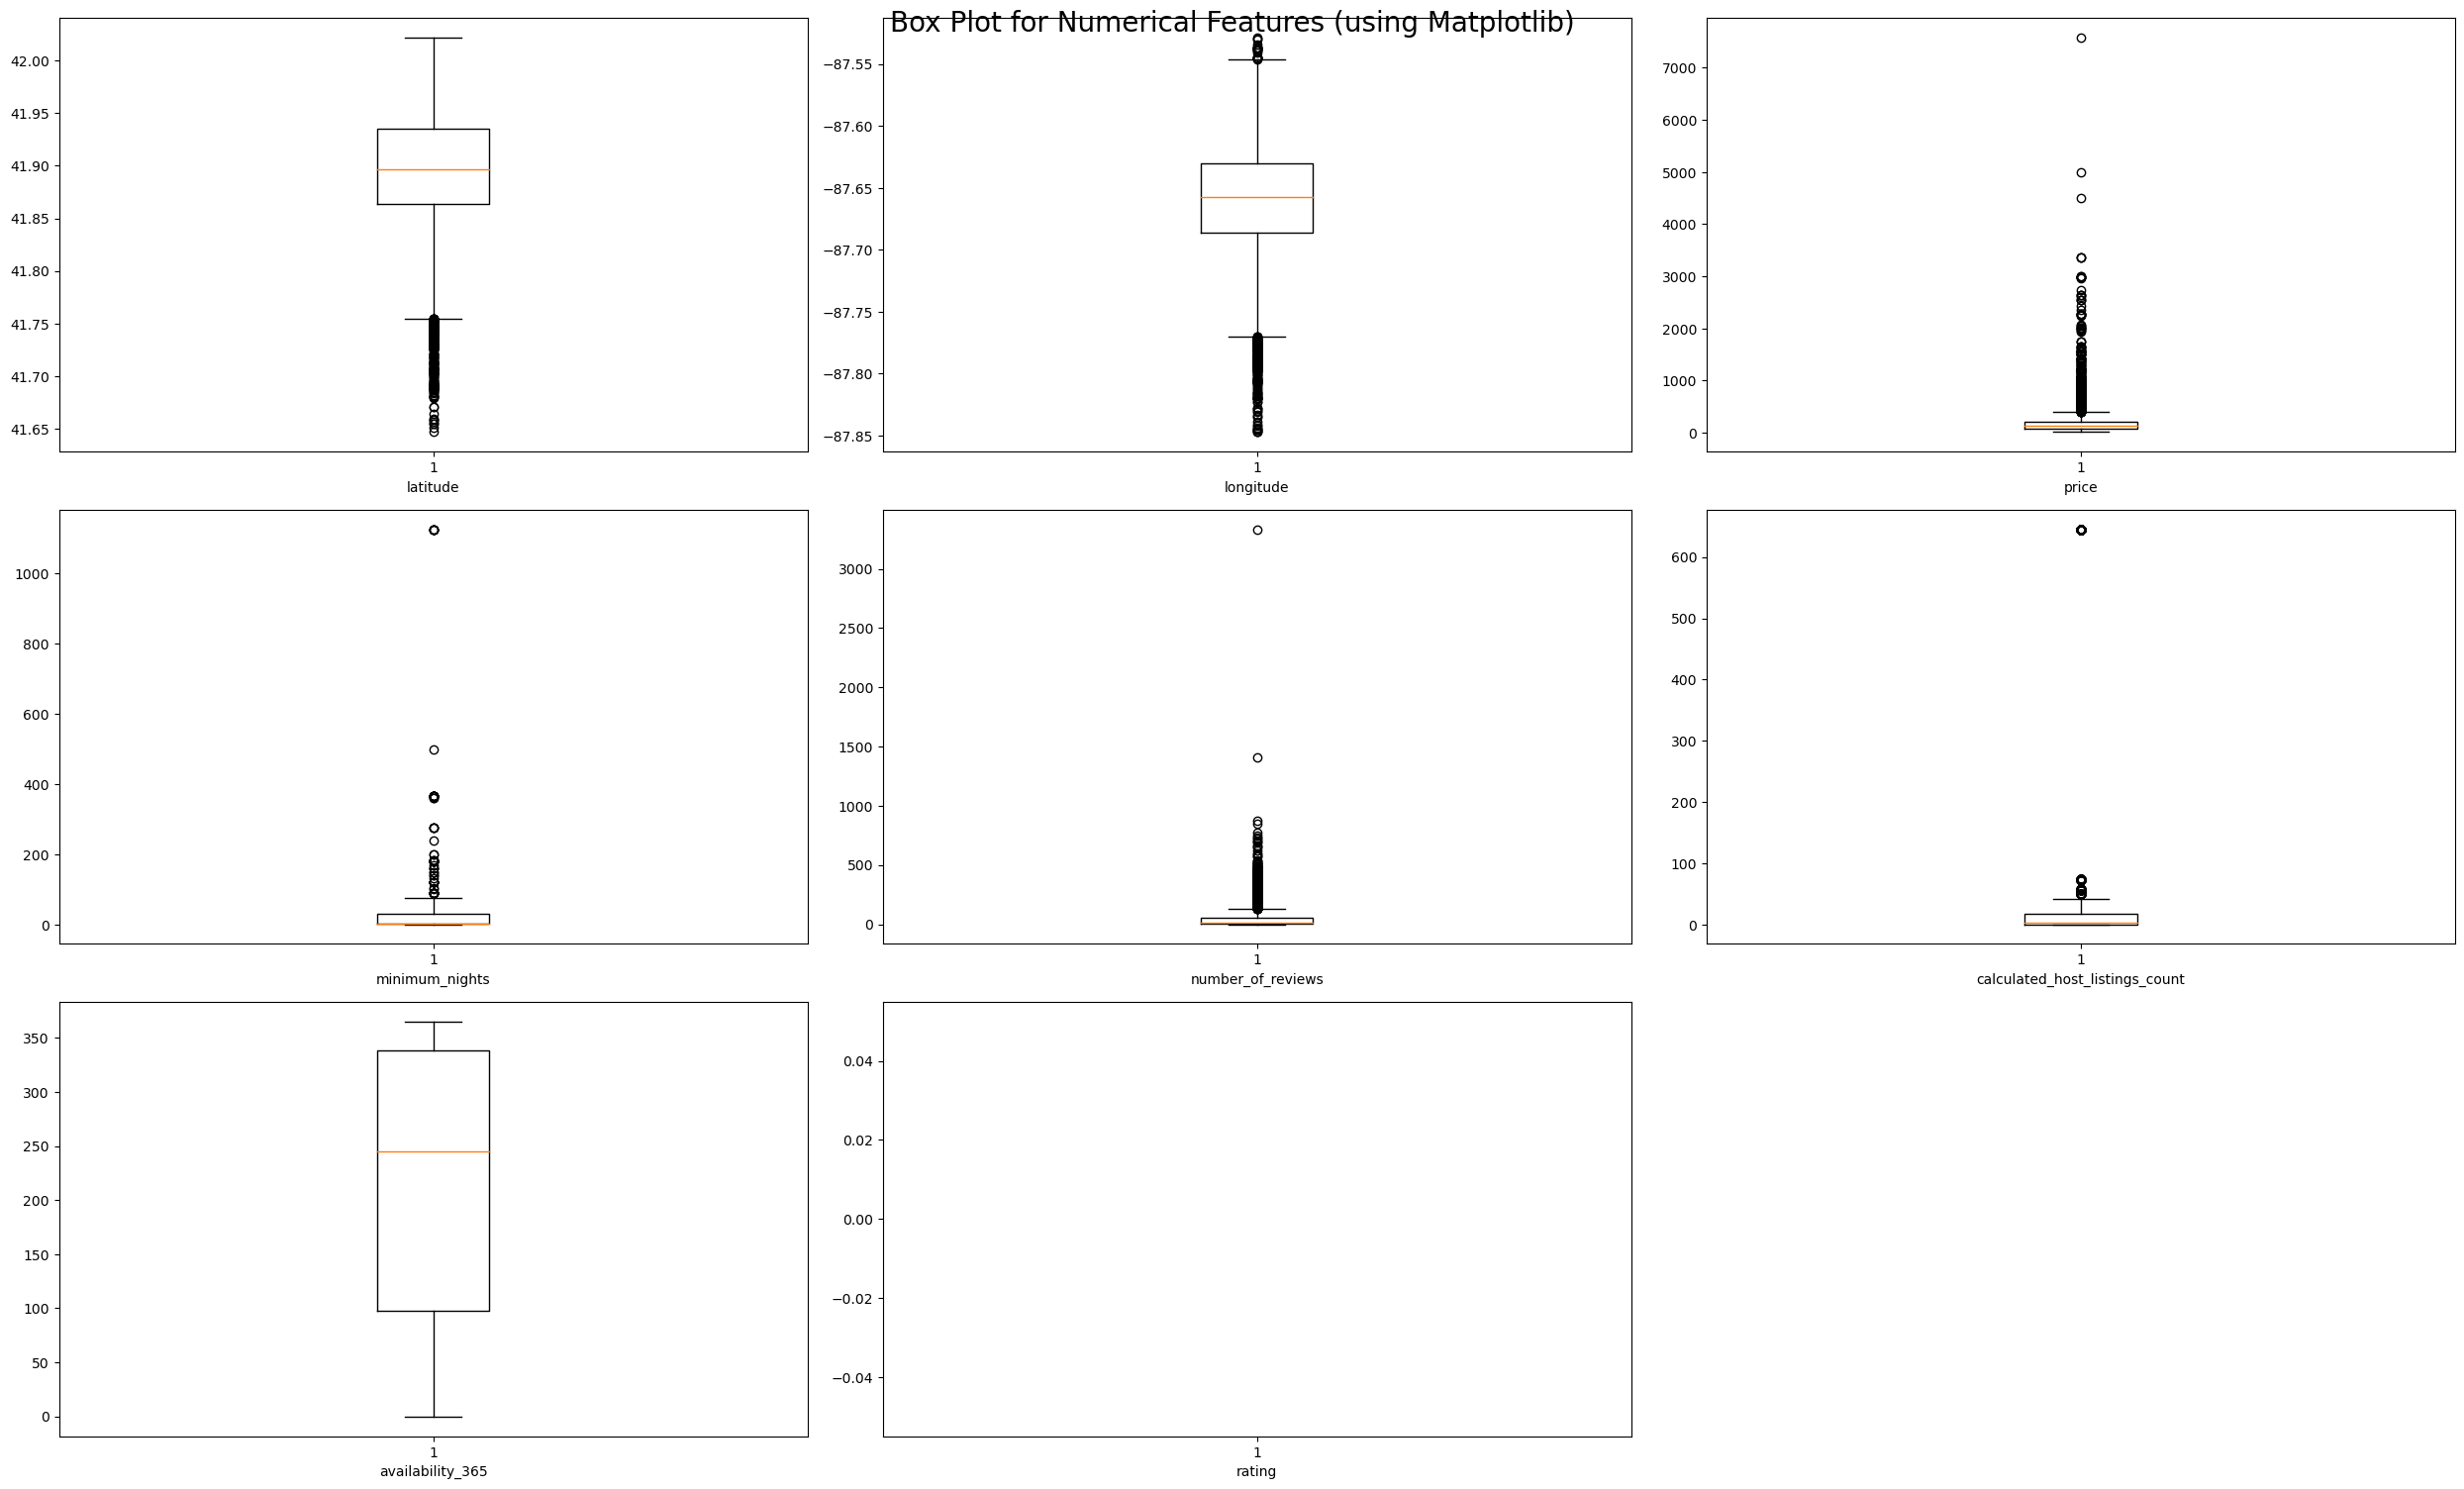

In [731]:
plt.figure(figsize=(25,25))
plt.suptitle('Box Plot for Numerical Features (using Matplotlib)',fontsize= 20)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    plt.boxplot(df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

<h4> Price </h4>
Plot shows that the median price is around 136 . Most of the prices lie between 90 to 216 . There are a lot of outliers for this feature.

<h4> Minimum Nights </h4>
Plot shows that the median nights is around 2 . Most of the nights lie between 2 to 32 . There are a few outliers for this feature.

<h4>Number of Reviews </h4> 
Plot shows that the median reviews  is around 16 . Most of the values lie between 0 and 57 . There are a lot of outliers for this feature.

<h4> Host Listings Count </h4>
Plot shows that the median count is around 4.0 . Most of the counts lie between 1 and 19 . There are a few for this feature.

<h4> Availability 365 </h4>
Plot shows that the median value is around 263 days . Most of the ratings lie between 148 to 341 .

<h4> Rating </h4>
Plot shows that the median rating is around 4.7 . Most of the ratings lie between 4.7 to 5 . There are a lot of outliers for ratings feature.

In [732]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rating
count,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,5879.000000
mean,41.892217,-87.661855,199.255349,15.690336,46.714790,58.115801,214.914531,4.774514
std,0.062775,0.044106,267.550930,40.303094,87.861866,168.761371,126.484417,0.260810
min,41.646767,-87.847243,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,41.863335,-87.686209,87.000000,2.000000,1.000000,1.000000,98.000000,4.690000
50%,41.896410,-87.657269,135.000000,2.000000,14.000000,3.000000,245.000000,4.840000
75%,41.935580,-87.630197,214.000000,32.000000,54.000000,18.750000,338.000000,4.940000
max,42.022200,-87.528420,7585.000000,1125.000000,3332.000000,645.000000,365.000000,5.000000


We can observe the following issues:
- The max. price is 7585 which is so far away from the mean and 75% quartile.
- Max of minimum nights is 1250.
- Min. of availability_365 is 0

#### Data Cleaning

#### Dropping rows which have availability less than 1 (because it does have much significance if its not available for whole year)

In [733]:
availability_rows_to_drop = df[df['availability_365'] < 1].index
df = df.drop(index=availability_rows_to_drop)
df.shape

(7758, 15)

#### Remove Outliers for Price Column

In [734]:
z_scores = df['price'].sub(df['price'].mean()).div(df['price'].std())

df = df[z_scores.abs() <= 3]
df

,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,type_of_apartment,rating,bedroom,beds,bath
0,Rebecca,Hyde Park,41.787900,-87.587800,Private room,114,3,227,1,322,Condo in Chicago,4.99,1 bedroom,1 bed,1 shared bath
1,Sarah,West Town,41.901660,-87.680210,Entire home/apt,92,32,505,1,347,Rental unit in Chicago,4.70,1 bedroom,1 bed,1 bath
2,At Home Inn,Lincoln Park,41.911960,-87.639810,Entire home/apt,170,4,72,7,146,Rental unit in Chicago,4.65,2 bedrooms,2 beds,1 bath
3,Shay And Robert,Lincoln Park,41.923570,-87.649470,Private room,329,2,15,1,165,Boutique hotel in Chicago,4.93,1 bedroom,1 bed,1 private bath
4,Red,Lincoln Park,41.925961,-87.656364,Entire home/apt,61,32,42,4,284,Rental unit in Chicago,4.29,1 bedroom,1 bed,1 bath
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,Louis,Near West Side,41.875333,-87.689492,Entire home/apt,438,30,0,3,222,Rental unit in Chicago,NaN,5 bedrooms,8 beds,3 baths
8524,Zaine Lizandra,Mckinley Park,41.825997,-87.669151,Private room,32,2,0,9,354,Home in Chicago,NaN,1 bedroom,1 bed,2 shared baths
8525,Jaylin,West Englewood,41.763133,-87.656318,Entire home/apt,24,32,0,1,269,Home in Chicago,NaN,3 bedrooms,3 beds,2 baths
8526,Blueground,Loop,41.869479,-87.631225,Entire home/apt,127,32,0,645,332,Rental unit in Chicago,NaN,1 bedroom,1 bed,1 bath


#### Imputing null values with mean for numerical variable and mode for categorical variable

In [735]:
# for numerical data fill with mean
df = df.fillna(df.mean())
df.isna().sum()

C:\Users\anag\AppData\Local\Temp\ipykernel_9496\3393874329.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


host_name                          0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
type_of_apartment                  0
rating                             0
bedroom                            0
beds                              17
bath                              11
dtype: int64

In [736]:
# for categorical data fill with mode
df.fillna(df['beds'].mode()[0], inplace=True)
df.fillna(df['bath'].mode()[0], inplace=True)

df.isna().sum()

host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
type_of_apartment                 0
rating                            0
bedroom                           0
beds                              0
bath                              0
dtype: int64

In [737]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rating
count,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000
mean,41.891575,-87.661964,177.539631,14.927944,48.944976,61.527054,235.872265,4.774902
std,0.063334,0.044567,149.102076,41.541262,90.862155,173.517065,112.580262,0.209915
min,41.646767,-87.847243,12.000000,1.000000,0.000000,1.000000,1.000000,2.330000
25%,41.859449,-87.686350,89.000000,2.000000,1.000000,1.000000,147.000000,4.770000
50%,41.896330,-87.657390,136.000000,2.000000,16.000000,4.000000,263.000000,4.774902
75%,41.935850,-87.630300,211.000000,32.000000,57.000000,19.000000,341.000000,4.900000
max,42.022200,-87.528420,1010.000000,1125.000000,3332.000000,645.000000,365.000000,5.000000


#### Creating a new dataframe which contains data for 7 most popular neighbourhoods

In [738]:
pf = df.groupby('neighbourhood').size().to_frame(name='count').reset_index()
datafr = pf.sort_values('count',ascending = False).head(7)
neighbourhood_values = datafr['neighbourhood'].values
df2 = df[df['neighbourhood'].isin(neighbourhood_values)]

<Figure size 640x480 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

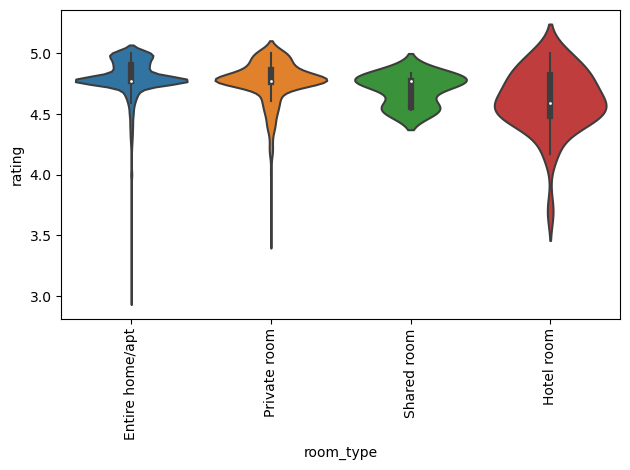

In [739]:
plt.suptitle('Violin Plot for ratings according to room type for the most popular neighbourhoods',fontsize= 25)
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
viz_2=sns.violinplot(data=df2, x='room_type', y='rating',scale = 'width')
plt.xticks(rotation = 90)
plt.tight_layout()

#### We see from the violin plot that the hotel room has the least average rating . Shared room has more average rating then Hotel Room . The highest average rating is for Entire Home/Apartments.

In [408]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


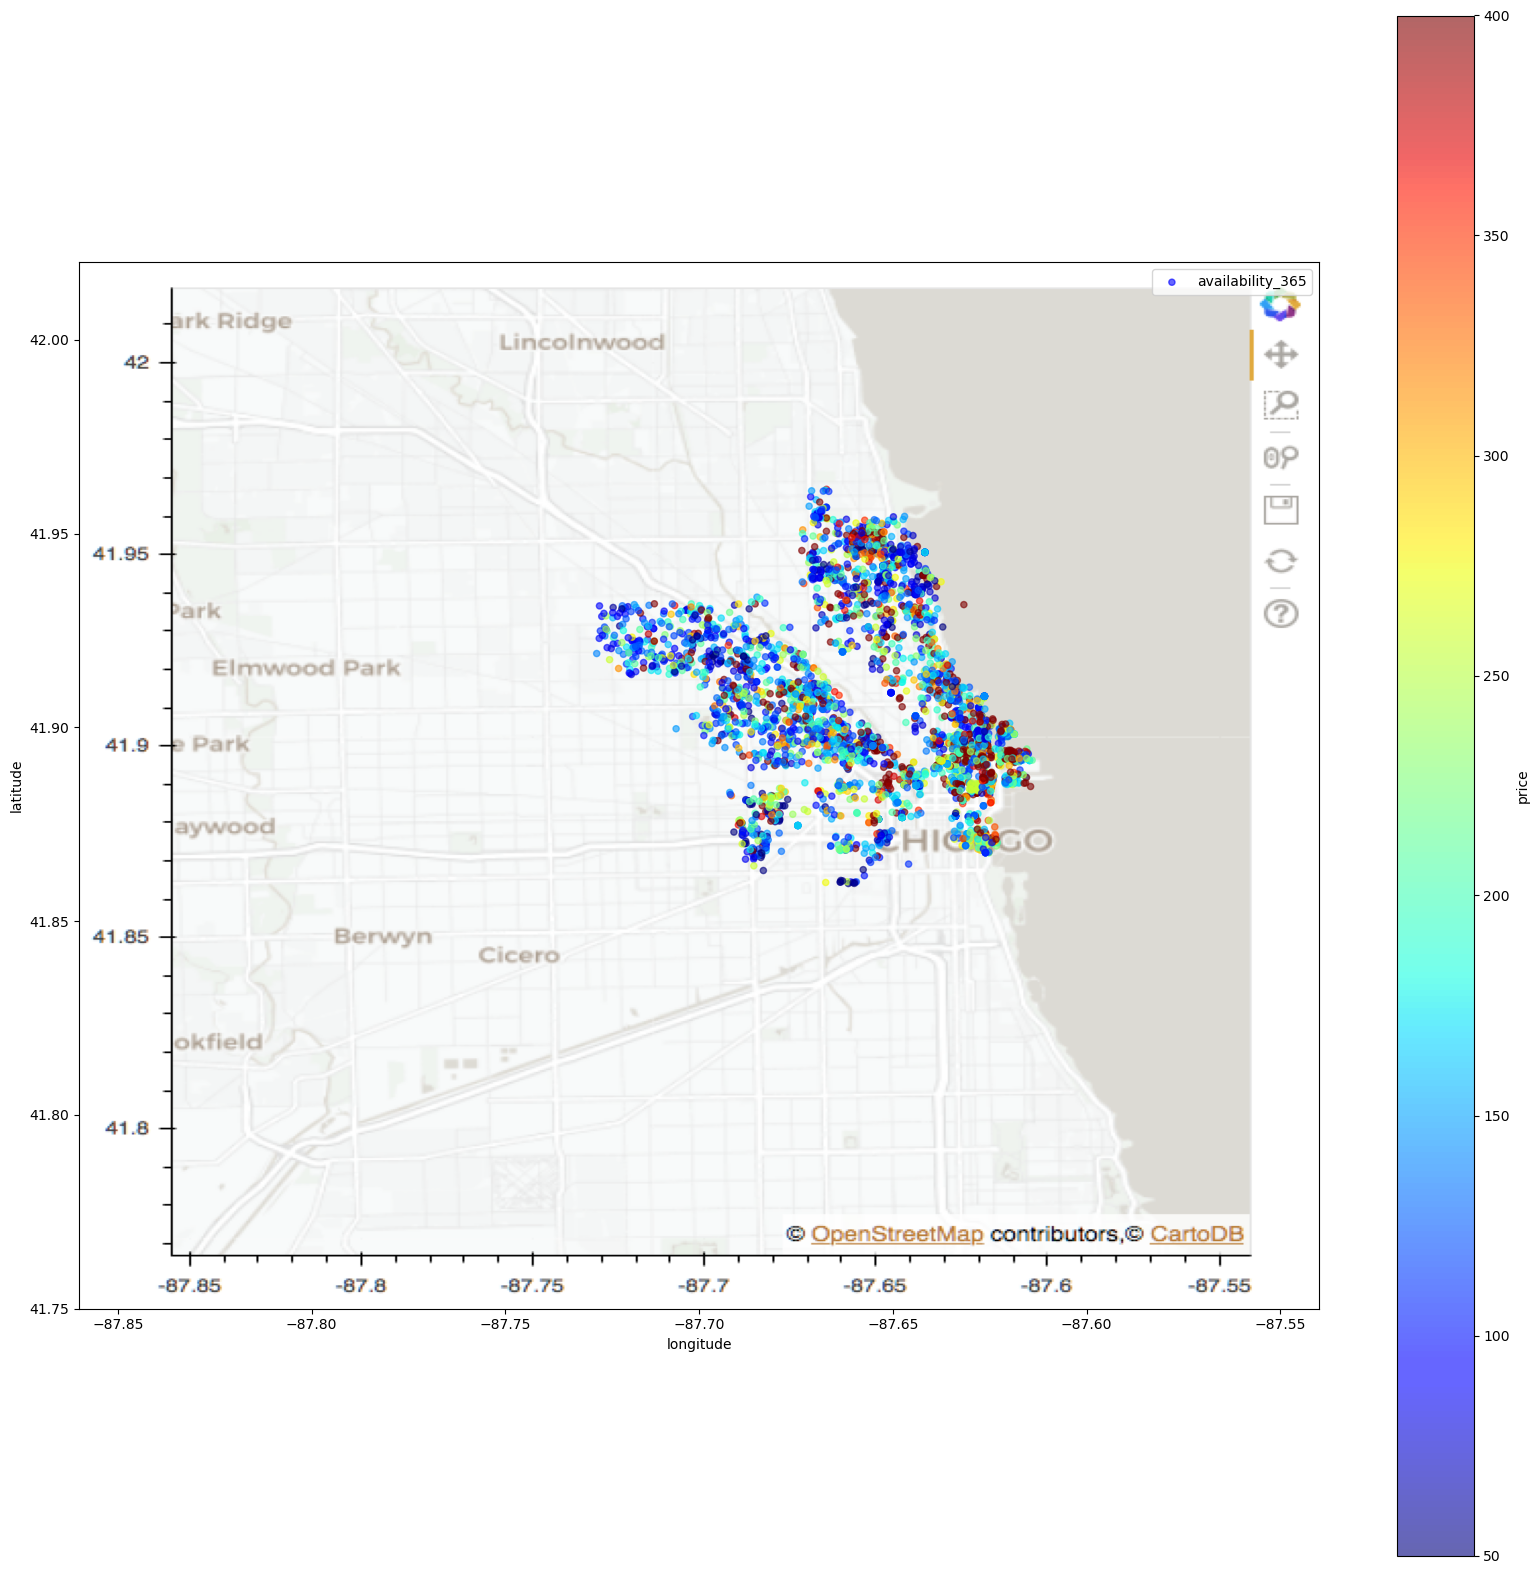

In [740]:
#initializing the figure size
plt.figure(figsize=(20,20))
#loading the png Chicago image from the local folder
path = r'C:\Users\anag\Downloads\chicago_map.png'
chicago_img=cv2.imread(path)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(chicago_img,zorder=0,extent=[-87.86, -87.54, 41.75,42.02])
ax=plt.gca()
#using scatterplot 
df2.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, vmin = 50 , vmax = 400,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.6, zorder=5)

plt.legend()
plt.show()

We observe that we end up with a very immersive heatmap. Using latitude and longitude points were able to visualize all Chicago listings. Also, we added a color-coded range for each point on the map based on the price of the listing. However, it is important to note that we had to drop some extremely high values as they are treated as outliers for our analysis.

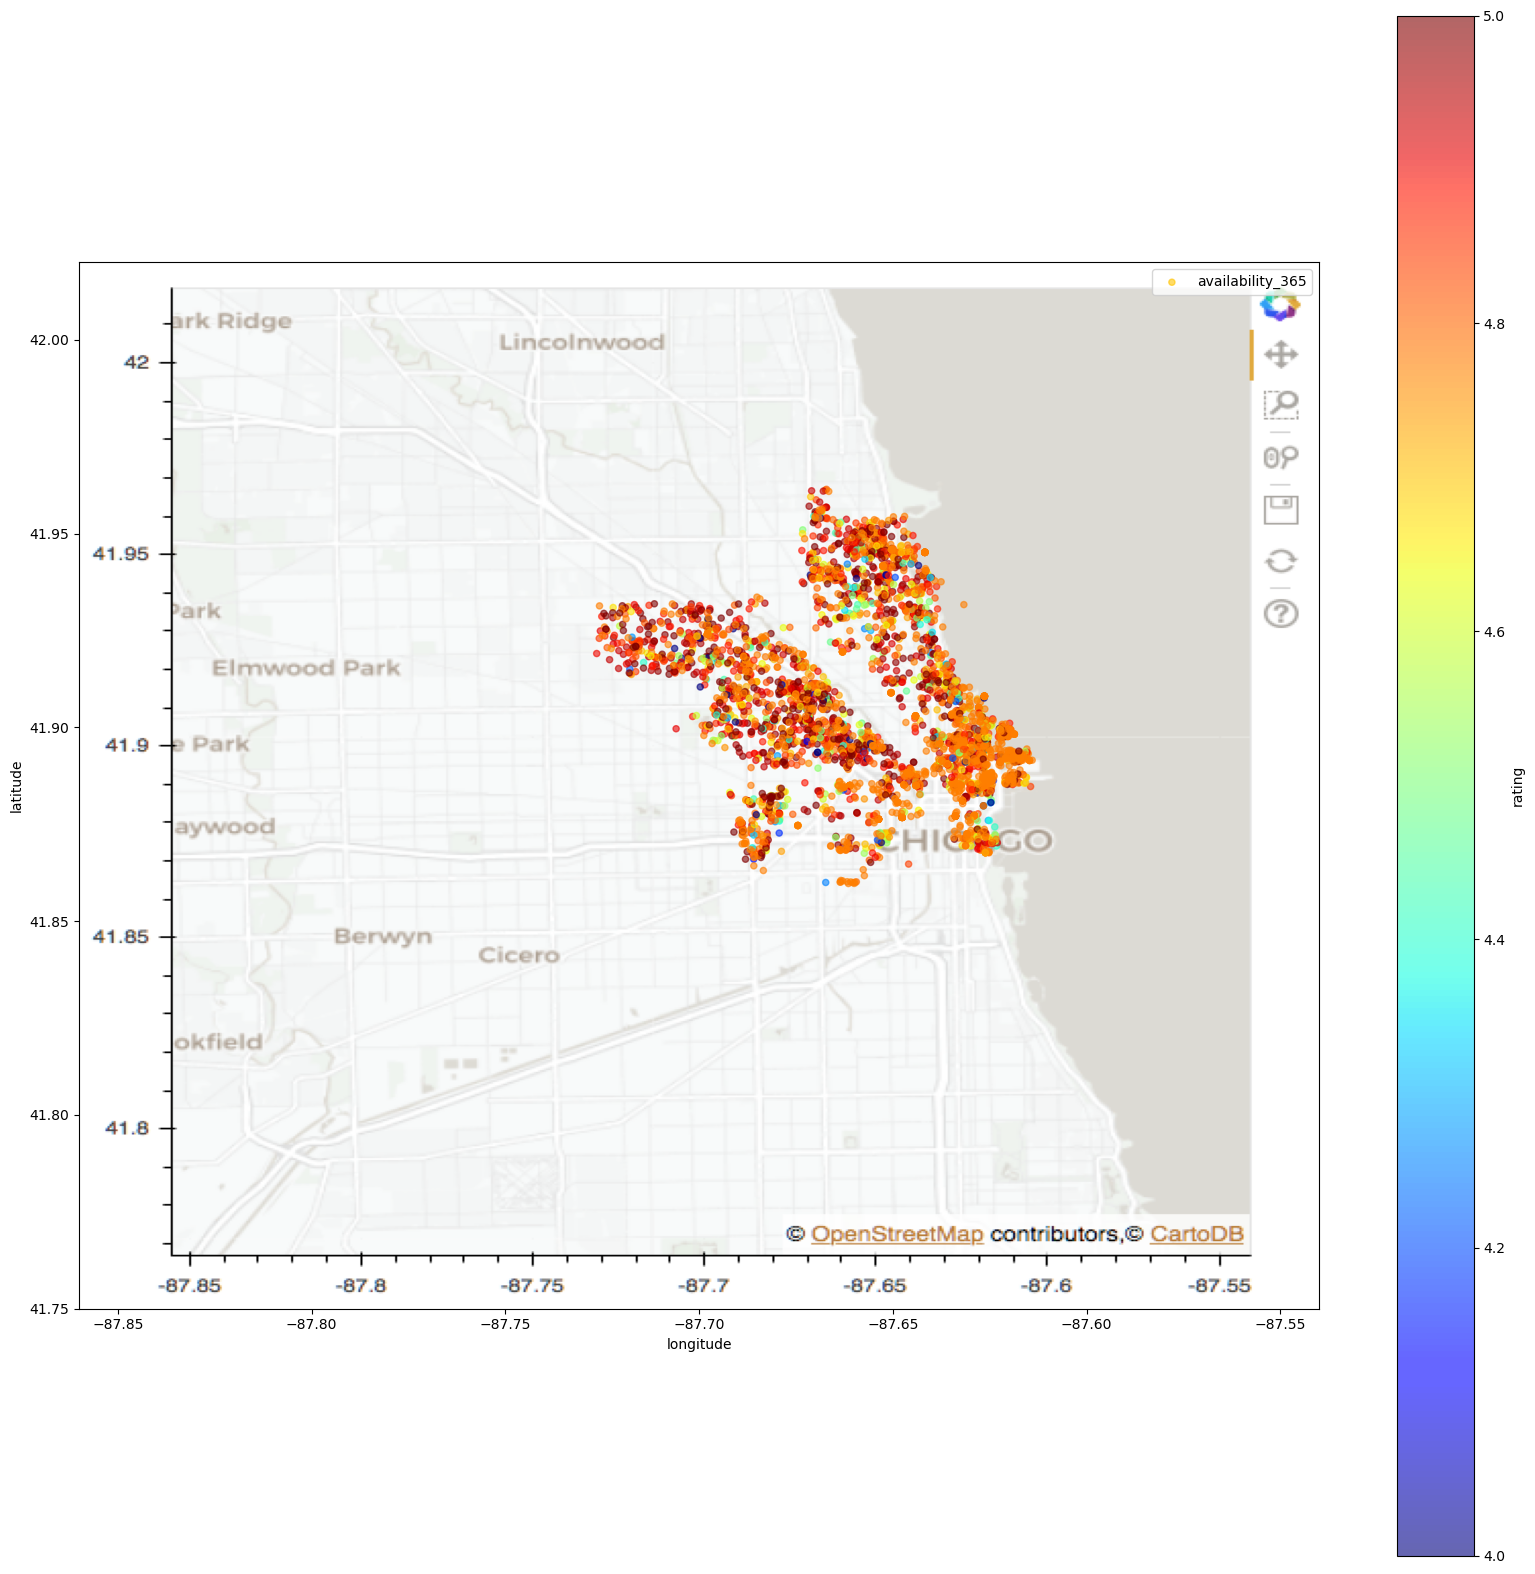

In [741]:
#initializing the figure size
plt.figure(figsize=(20,20))
#loading the png Chicago image from the local folder
path = r'C:\Users\anag\Downloads\chicago_map.png'
chicago_img=cv2.imread(path)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(chicago_img,zorder=0,extent=[-87.86, -87.54, 41.75,42.02])
ax=plt.gca()
#using scatterplot
df2.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='rating', ax=ax, vmin=4, vmax=5,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.6, zorder=5)

plt.legend()
plt.show()

Using latitude and longitude points were able to visualize all Chicago listings. Also, we added a color-coded range for each point on the map based on the rating of the listing. However, it is important to note that we had to drop some extremely high values as they are treated as outliers for our analysis.

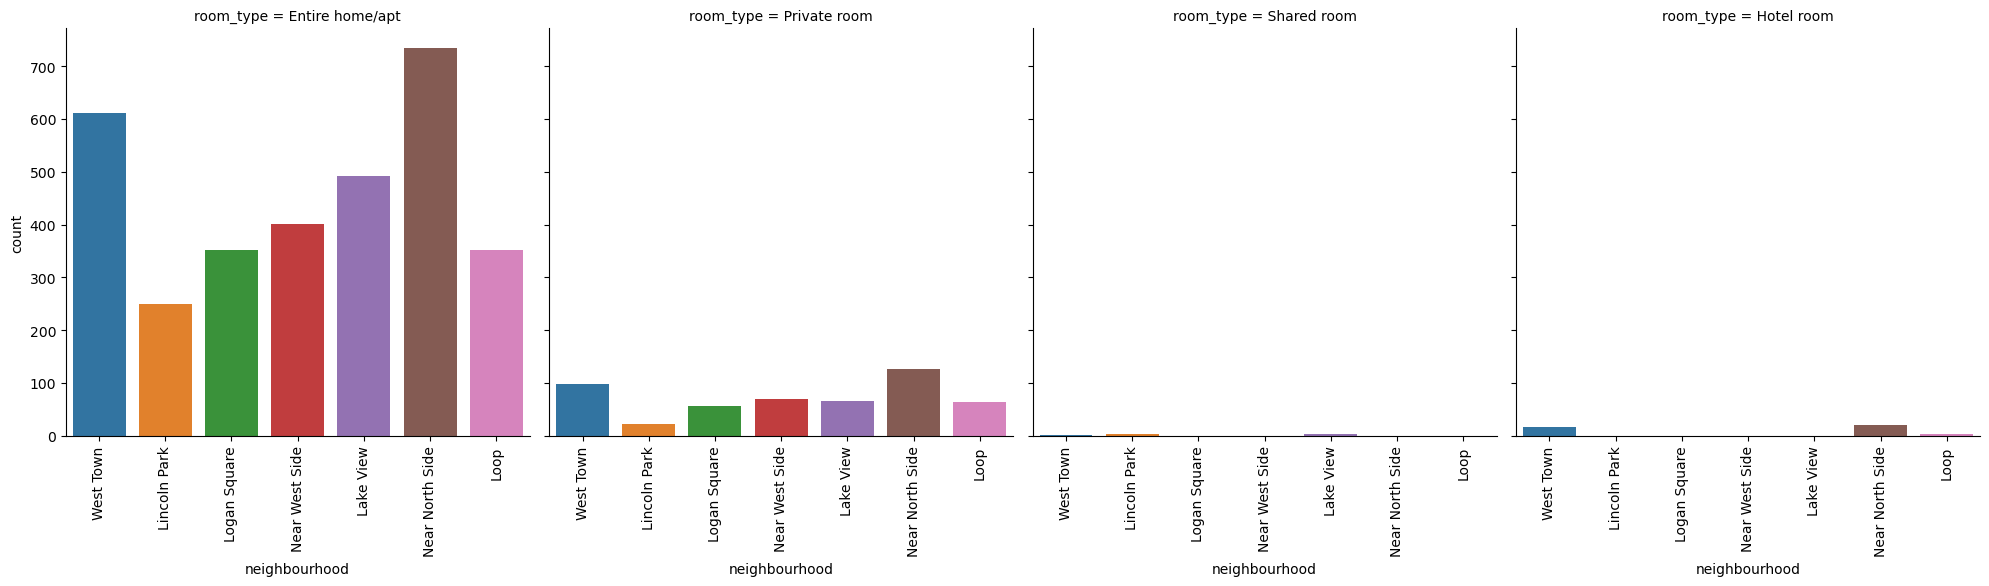

In [742]:
viz_3=sns.catplot(x='neighbourhood', col='room_type', data=df2, kind='count')
viz_3.set_xticklabels(rotation=90)

Lets breakdown on what we can see from this plot. First, we can see that our plot consists of 4 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. The observation that is definitely contrasted the most is that 'Shared room' and 'Hotel room' type Airbnb listing is barely available among 7 most listing-populated neighborhoods.

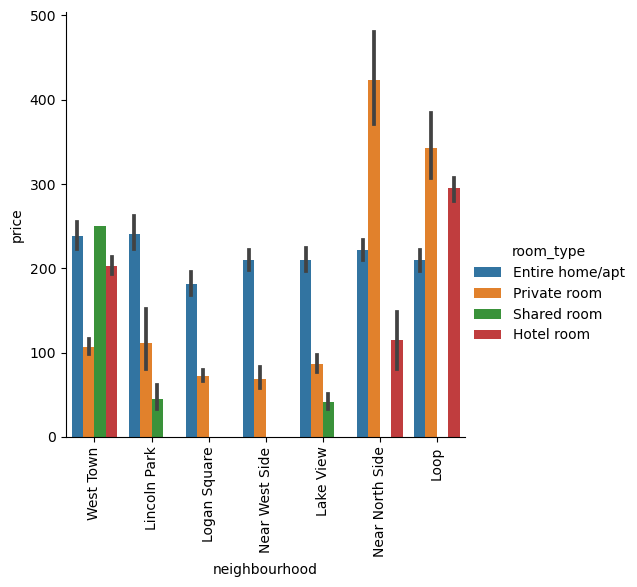

In [744]:
viz_3=sns.catplot(x='neighbourhood', y='price', hue = 'room_type', data=df2, kind='bar')
viz_3.set_xticklabels(rotation=90)

For Near North Side (which is the most popular neighbourhood) we can see the most expensive room type  is Private Room followed by Apartment/Entire Home . Shared Room has the least price (which also makes sense) . 
For Lincoln Park,Logan Square , Near west Side and Lake View the apartment prices are the highest.Also there are no hotel rooms in these areas. 
For West Town the hotel rooms are the costliest and private room is the cheapest.

### Check collinearity in numerical features

In [745]:
df3 = df.drop(columns=['latitude', 'longitude'])
df3[(list(df3.columns)[1:])].corr()

C:\Users\anag\AppData\Local\Temp\ipykernel_9496\3580971458.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3[(list(df3.columns)[1:])].corr()


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rating
price,1.000000,-0.067943,-0.060551,-0.047896,0.062983,0.114486
minimum_nights,-0.067943,1.000000,-0.116622,0.126430,0.064185,-0.016202
number_of_reviews,-0.060551,-0.116622,1.000000,-0.168929,-0.107254,0.077753
calculated_host_listings_count,-0.047896,0.126430,-0.168929,1.000000,0.158842,-0.018751
availability_365,0.062983,0.064185,-0.107254,0.158842,1.000000,-0.115827
rating,0.114486,-0.016202,0.077753,-0.018751,-0.115827,1.000000


C:\Users\anag\AppData\Local\Temp\ipykernel_9496\2457425901.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), cmap="CMRmap",annot=True)


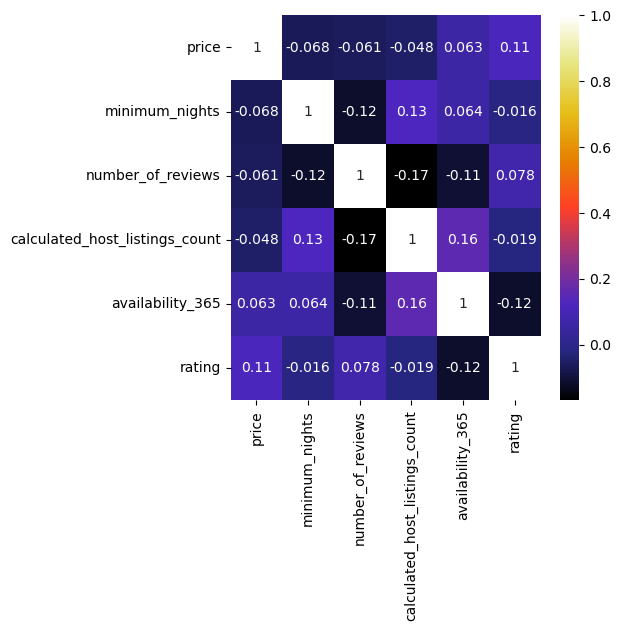

In [746]:
plt.figure(figsize= (5,5))
sns.heatmap(df3.corr(), cmap="CMRmap",annot=True)
plt.show()

# Inference
The data shows that airbnb listings price is affected by neighbourhoods , type of listings and ratings . Let us try to answer these questions  - 
- What are the average prices of Airbnb listings in different neighborhoods?
- What are the most popular types of Airbnb listings in Chicago? (e.g., apartments, houses, condos, etc.)?
- How do Airbnb guests rate their experiences in Chicago?
- What are the most popular Airbnb listings for people on a budget?
- What are the most popular Airbnb listings for people who are looking for a luxury experience?


What are the average prices of Airbnb listings in different neighborhoods?

<Figure size 640x480 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

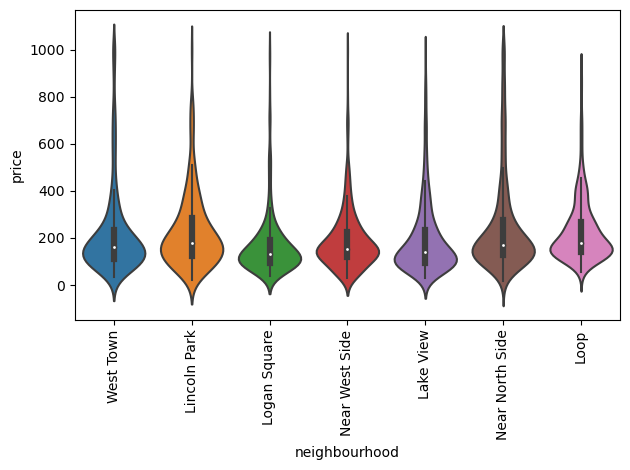

In [747]:
plt.suptitle(' Violin Plot for prices of most popular neighbourhoods',fontsize= 25)
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
sns.violinplot(data=df2, x='neighbourhood', y='price',scale = 'width')
plt.xticks(rotation = 90)
plt.tight_layout()

With a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in Chicago Neighbourhoods. First, we can state that Near North Side has the highest range of prices for the listings with 248 dollars price as average observation, followed by Loop with 230 dollars per night. Logan Square is the cheapest of them all. 

#### Creating a dataframe which contains the average prices for the 7 most popular neighbourhoods

In [748]:
neighbourhoods_with_mean_price =  df2.groupby('neighbourhood')['price'].mean()
neighbourhoods_with_mean_prices_df =pd.DataFrame(neighbourhoods_with_mean_price)
neighbourhoods_with_mean_prices_df.reset_index(inplace=True)
neighbourhoods_with_mean_prices_df = neighbourhoods_with_mean_prices_df.sort_values('price',ascending = False)
neighbourhoods_with_mean_prices_df

,neighbourhood,price
4,Near North Side,248.126840
3,Loop,230.738095
1,Lincoln Park,227.652174
6,West Town,219.220850
0,Lake View,194.254448
5,Near West Side,189.193206
2,Logan Square,166.110024


Text(0.5, 9.444444444444438, 'Neighbourhood')

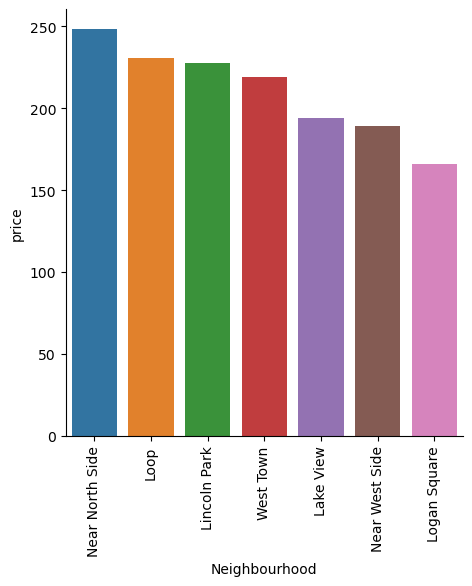

In [749]:
viz_3=sns.catplot(x='neighbourhood', y='price', data=neighbourhoods_with_mean_prices_df, kind='bar')
viz_3.set_xticklabels(rotation=90)
plt.xlabel('Neighbourhood')

As we can see Near North Side is the most expensive of all of the popular neighbourhoods and Logan Square is the cheapest

What are the most popular types of Airbnb listings in Chicago? (e.g., apartments, houses, condos, etc.)?

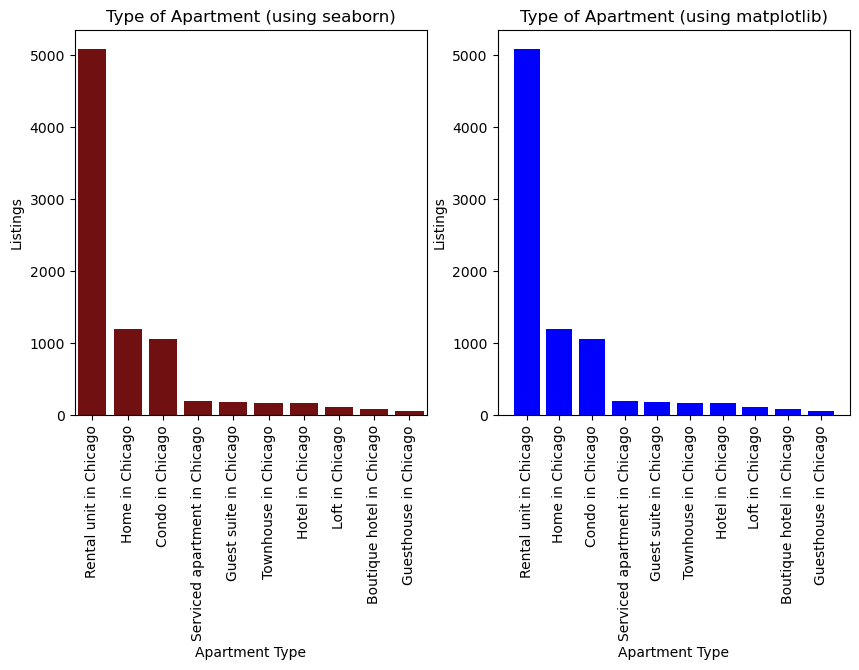

In [750]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='Apartment_Type', y='Listings', data=top_apartment_type_df, color = 'maroon')
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Type of Apartment (using seaborn)')
plt.xlabel('Apartment Type')
plt.ylabel('Listings')


plt.subplot(1, 2, 2) 
plt.bar(top_apartment_type_df['Apartment_Type'],top_apartment_type_df['Listings'],color = 'blue')
# Set plot label and title
plt.xticks(rotation = 90)
plt.title('Type of Apartment (using matplotlib)')
plt.xlabel('Apartment Type')
plt.ylabel('Listings')
plt.show();

The most popular type of apartments are Rental units in Chicago which are almost over 5000 listings . It is followed by homes,condos which have around 1000 listings . Rest of the apartment types have very few listings

Note that here also I have only displayed the top 10 apartment types in the visualization because majority of apartment types have a very low frequency count .  

How do Airbnb guests rate their experiences in Chicago?

In [751]:
neighbourhoods_with_highest_ratings =  df.groupby('neighbourhood')['rating'].mean().head(10)
top_rated_neighbourhoods_df =pd.DataFrame(neighbourhoods_with_highest_ratings)
top_rated_neighbourhoods_df.reset_index(inplace=True)
top_rated_neighbourhoods_df = top_rated_neighbourhoods_df.sort_values('rating',ascending = False)
top_rated_neighbourhoods_df

,neighbourhood,rating
0,Albany Park,4.852488
6,Avondale,4.834537
3,Ashburn,4.826774
7,Belmont Cragin,4.824978
8,Beverly,4.824082
4,Auburn Gresham,4.799028
5,Austin,4.752563
1,Archer Heights,4.743333
2,Armour Square,4.714420
9,Bridgeport,4.672730


Text(0.5, 9.444444444444438, 'Neighbourhood')

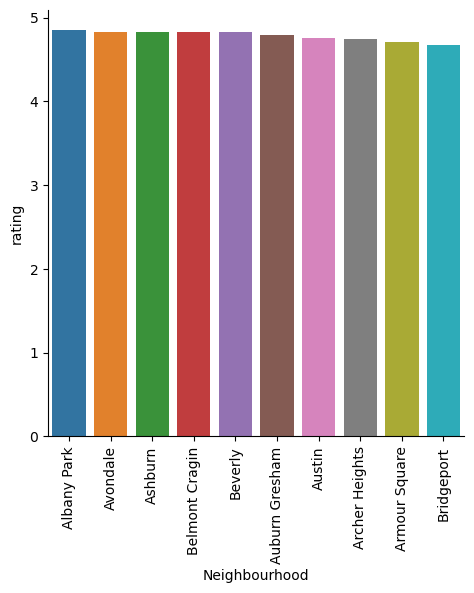

In [752]:
viz_3=sns.catplot(x='neighbourhood', y='rating', data=top_rated_neighbourhoods_df, kind='bar')
viz_3.set_xticklabels(rotation=90)
plt.xlabel('Neighbourhood')

Albany Park is the neighbourhood with the highest average rating (4.87) . It is followed by  Avondale and Ashburn and Beverly.

What are the most popular Airbnb listings for people on a budget?

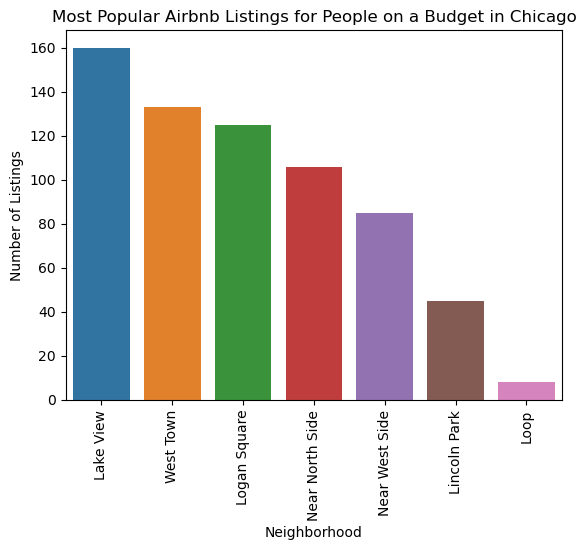

In [753]:
chicago_airbnb_df = df2[df2['price'] < 100]

# Create a bar plot of the number of listings in each neighborhood
sns.barplot(x=chicago_airbnb_df['neighbourhood'].value_counts().index, y=chicago_airbnb_df['neighbourhood'].value_counts().values)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Most Popular Airbnb Listings for People on a Budget in Chicago')
plt.xticks(rotation = 90)
plt.show()

Lake View is most affordable neighbourhood . It is followed by West Town , Logan Square and then Near North Side (which is one of the touristy areas ).

What are the most popular Airbnb listings for people who are looking for a luxury experience?

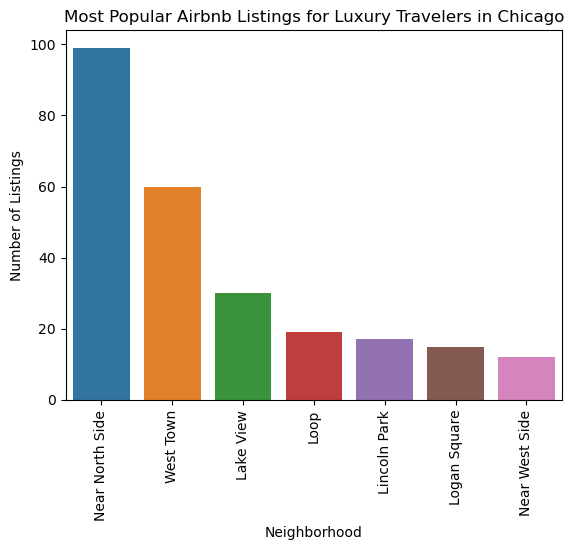

In [754]:
chicago_airbnb_df = df2[df2['price'] > 500]

# Create a bar plot of the number of listings in each neighborhood
sns.barplot(x=chicago_airbnb_df['neighbourhood'].value_counts().index, y=chicago_airbnb_df['neighbourhood'].value_counts().values)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Most Popular Airbnb Listings for Luxury Travelers in Chicago')
plt.xticks(rotation = 90)
plt.show()

Near North Side is the most luxurious neighbourhood among the most popuar neighbourhoods

# CONCLUSION

Airbnb is a popular choice for accommodation in Chicago, and the city has a wide range of listings to suit all budgets and needs. 
The most popular neighborhoods for Airbnb listings are  Near North Side ,West Town, Lake View, West Side, Logan Square and Loop. 

The neighborhoods with the highest average Airbnb ratings are Albany Park ,Avondale ,Ashburn and Auburn Gresham. However, it is important to note that the average rating is just one factor to consider when choosing a neighborhood. Other factors to consider include the amenities offered, the location of the neighborhood, and the price of Airbnb listings in the neighborhood.

Airbnb can be a good option for travelers who are on a budget. 

Airbnb can be a good option for travelers who are traveling with a group or family. Airbnb listings often have more space than traditional hotel rooms, and they may also have amenities such as multiple bedrooms, bathrooms. The analysis we did some listings even had more than 8 bedrooms/bathrooms.

Airbnb hosts and property managers can use the information to improve their listings and pricing. Travelers can use the information to find the best deals on Airbnb rentals.

Overall, Airbnb is a popular and convenient option for accommodation in Chicago.

__Limitations:__

We filled the missing values for ratings with the mean value of ratings which is not the best thing to do. Some listings just dont have any ratings . But we cannot say the the rating for the listing is bad . We could also not remove the rows with the null values because that could mean loss of useful data we dont know yet . 

# References
1. Data source : http://insideairbnb.com/get-the-data/
2. Seaborn library: https://seaborn.pydata.org/
3. Matplot library : https://matplotlib.org/
4. https://www.google.com/
5. https://stackoverflow.com/